# Lecture 25 - Best Practices for Training ANNs continued & Convolutional Neural Networks (CNNs)

---

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [25]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, t_train_full), (X_test, t_test) = fashion_mnist.load_data()

X_train_full.shape, t_train_full.shape, X_test.shape, t_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [26]:
# Training and Validation sets
# First 5,000 samples as validation and the remaining ones as training samples
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
t_valid, t_train = t_train_full[:5000], t_train_full[5000:]

X_test = X_test / 255.0

In [27]:
class_names = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

T-shirt/top


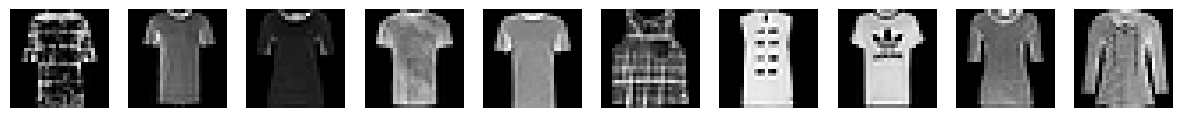

Trouser


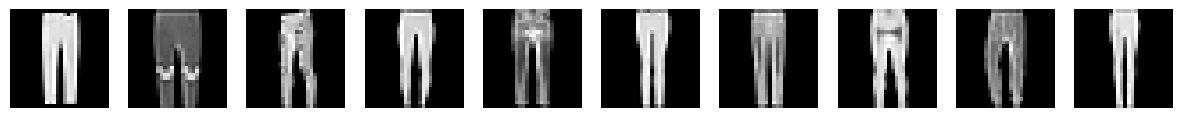

Pullover


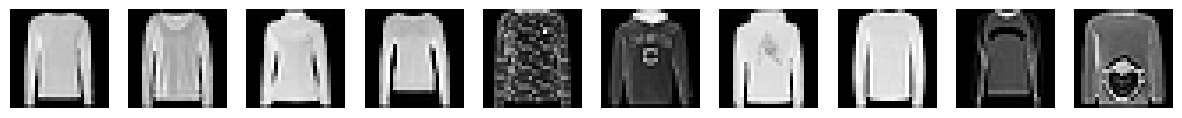

Dress


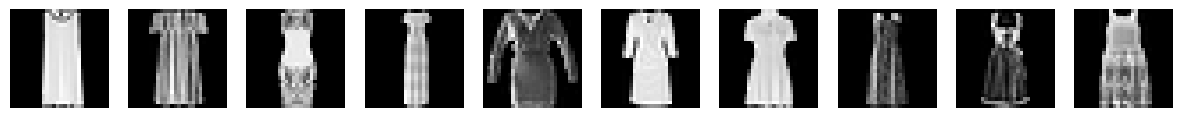

Coat


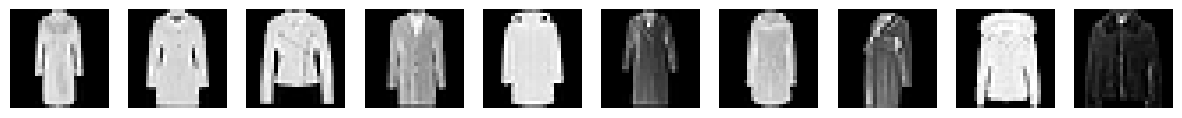

Sandal


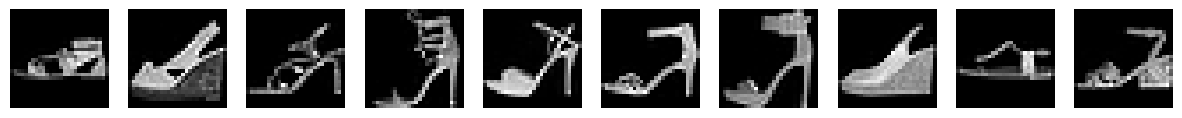

Shirt


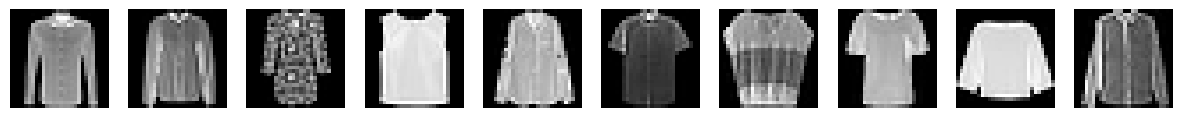

Sneaker


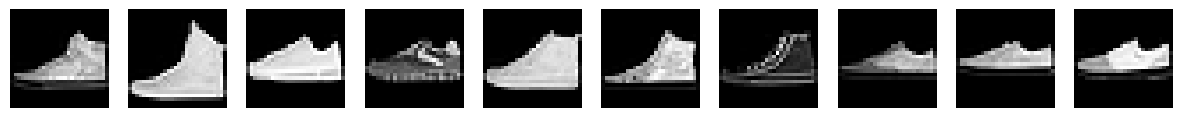

Bag


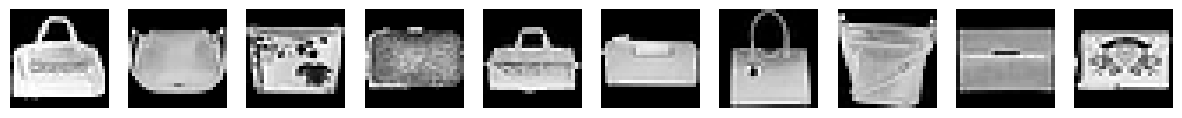

Ankle boot


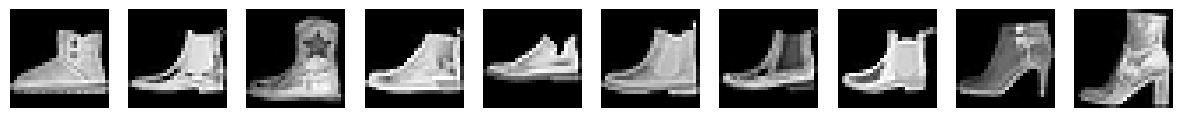

In [28]:
for i in range(10):
    labels = np.where(t_train==i)[0]
    idx = np.random.permutation(range(len(labels)))
    print(class_names[i])
    plt.figure(figsize=(15,3))
    for j in range(1,11):
        plt.subplot(1,10,j)
        plt.imshow(X_train[labels[j],:,:], cmap='gray')
        plt.axis('off')
    plt.pause(0.01);

## Creating the model using the Sequential API

Now let's build the neural network! Here is a classification MLP with two hidden layers:

In [29]:
model = keras.models.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.output_shape

(None, 10)

The model's ```summary()``` method displays all the model's layers, including each layer's name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters:

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Note that Dense layers often have a lot of parameters. For example, the first hidden layer has $784 \times 300$ connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the **risk of overfitting**, especially when you do not have a lot of training data.

## Compiling the Model

After a model is created, you must call its ```compile()``` method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:

In [31]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

We use the ```sparse_categorical_crossentropy``` loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. 

If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. $[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]$ to represent class 3), then we would need to use the ```categorical_crossentropy``` loss instead. 

* If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the ```keras.utils.to_categorical()``` function.

If we were doing binary classification or multilabel binary classification, then we would use the ```sigmoid``` (i.e., logistic) activation function in the output layer instead of the ```softmax``` activation function, and we would use the ```binary_crossentropy``` loss.

In [32]:
optimizer=keras.optimizers.SGD(learning_rate=0.01)
optimizer

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

## Training and evaluating the model

Now the model is ready to be trained. For this we simply need to call its ```fit()``` method:

In [36]:
X_train.shape, 55000/32

((55000, 28, 28), 1718.75)

In [34]:
history = model.fit(X_train, t_train, epochs=10, batch_size=32,
                    validation_data=(X_valid, t_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6931 - loss: 0.9944 - val_accuracy: 0.8340 - val_loss: 0.5017
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8265 - loss: 0.5021 - val_accuracy: 0.8468 - val_loss: 0.4590
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8394 - loss: 0.4526 - val_accuracy: 0.8524 - val_loss: 0.4417
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8525 - loss: 0.4218 - val_accuracy: 0.8544 - val_loss: 0.4237
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8612 - loss: 0.3941 - val_accuracy: 0.8696 - val_loss: 0.3815
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8655 - loss: 0.3836 - val_accuracy: 0.8702 - val_loss: 0.3705
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8680 - loss: 0.3715 - val_accuracy: 0.8724 - val_loss: 0.3639
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8758 - loss: 0.3561 - 

In [37]:
history.history

{'accuracy': [0.765781819820404,
  0.830054521560669,
  0.8435454368591309,
  0.8536182045936584,
  0.860872745513916,
  0.8654545545578003,
  0.8700181841850281,
  0.8753818273544312,
  0.8789272904396057,
  0.8807454705238342],
 'loss': [0.721085250377655,
  0.4889086186885834,
  0.444285124540329,
  0.41647011041641235,
  0.3964833915233612,
  0.38001129031181335,
  0.3672213852405548,
  0.3554973602294922,
  0.345048189163208,
  0.33587324619293213],
 'val_accuracy': [0.8339999914169312,
  0.8468000292778015,
  0.852400004863739,
  0.8543999791145325,
  0.8695999979972839,
  0.870199978351593,
  0.8723999857902527,
  0.8644000291824341,
  0.8712000250816345,
  0.8772000074386597],
 'val_loss': [0.501730740070343,
  0.45897436141967773,
  0.44170713424682617,
  0.42366358637809753,
  0.3815194070339203,
  0.37047529220581055,
  0.3639450967311859,
  0.38230812549591064,
  0.3628188371658325,
  0.3392903804779053]}

In [38]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [39]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

## Learning Curves from the model's ```history```

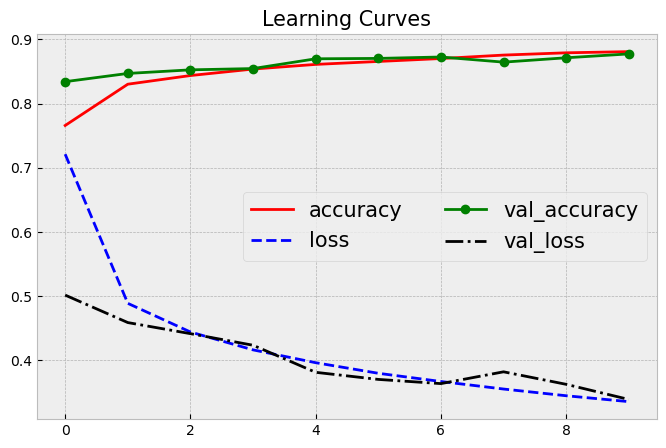

In [40]:
key_names = list(history.history.keys())
colors = ['-r','--b','-og','-.k']

plt.figure(figsize=(8,5))
for i in range(len(key_names)):
    plt.plot(history.history[key_names[i]], colors[i], label=key_names[i])
plt.legend(fontsize=15,ncol=2)
plt.title('Learning Curves', size=15);

In [41]:
model.evaluate(X_test, t_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8721 - loss: 0.3675


[0.3723203241825104, 0.8691999912261963]

*Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.*

## Using the model to make predictions

Next, we can use the model's ```predict()``` method to make predictions on new instances. Let's use test samples as an example:

In [42]:
X_new = X_test[:3]
X_new.shape

(3, 28, 28)

In [43]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.08, 0.  , 0.86],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

As you can see, for each instance the model estimates one probability per class, from class 0 to class 9.

In [44]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [45]:
class_names[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
t_test[:3]

array([9, 2, 1], dtype=uint8)

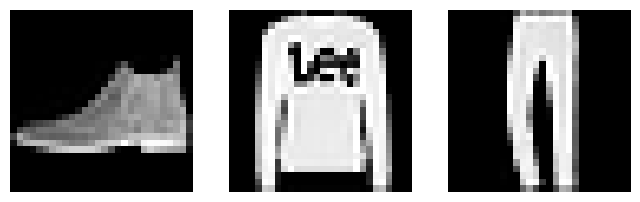

In [47]:
plt.figure(figsize=(8,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X_new[i],cmap='gray')
    plt.axis('off');

---

# 1. The Vanishing/Exploding Gradient Problem

* Backpropagation works by backpropagating the error gradients
* Gradients becomes smaller and smaller as it progresses down to lower layers, this is known as the **vanishing gradient problem**

**Solutions:**
1. Make variance of the output of each layer equal to the variances of its inputs
2. Utilize non-saturating activation functions
3. Batch normalization

## 1.1. Glorot and He Initialization

[In their paper](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf), Xavier Glorot and Yoshua Bengio propose a way to significantly alleviate the vanishing gradient problem. For the signal to flow properly, the authors argue that we need **the variance of the outputs of each layer to be equal to the variance of its inputs**, and we also need the gradients to have equal variance before and after flowing through a layer in the reverse direction.

* It is actually not possible to guarantee both unless the layer has an equal number of inputs and neurons (these numbers are called the fan-in and fan-out of the layer).

But they proposed a good compromise that has proven to work very well in practice: the connection weights of each layer must be initialized randomly as a Gaussian distribution with mean 0 and variance equal to 1 over the average fanning. This is known as the **Xavier Initialization**. 

In this table, you can see two other initializations that have also been shown to work empirically:

| Initialization | Activation Functions | $\sigma^2$ (Normal)|
| --              | --                             | --              | 
|  Glorot (2000)  |  Linear, Tanh, Sigmoid, Softmax  | $1/\text{fan}_{\text{avg}}$   |
|  He (2015)  |  ReLU and its variants  | $2/\text{fan}_{\text{in}}$   |
|  LeCunn (1999)  |  SELU  | $1/\text{fan}_{\text{in}}$   |

By default, Keras uses **Glorot initialization with a uniform distribution**. 

When creating a layer, you can change this to He initialization by setting ```kernel_initializer="he_uniform"``` or ```kernel_initializer="he_normal"``` like this:

In [ ]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

If you want He initialization with a uniform distribution but based on $\text{fan}_{\text{avg}}$ than $\text{fan}_{\text{in}}$, you can use the ```VarianceScaling``` initializer like this:

In [48]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., 
                                                 mode='fan_avg', 
                                                 distribution='uniform')

keras.layers.Dense(10, activation='sigmoid', kernel_initializer=he_avg_init)

<Dense name=dense_3, built=False>

## 1.2. Non-Saturing Activation Functions

One of the insights in the 2010 paper by Glorot and Bengio was that the vanishing gradients problems were in part due to a poor choice of activation function.

* In deep architectures, sigmoid activation functions tend to saturate.

Other activation functions behave much better, in particular the **ReLU activation function**, mostly because it does not saturate for positive values and also because it is quite fast to compute.

* Unfortunately, the ReLU activation function is not perfect. It suffers from a problem known as the dying neurons: during training, some neurons effectively die, meaning they stop outputting anything other than 0. When this happens, it just keeps outputting 0s, and gradient descent does not affect it anymore since the gradient of the ReLU function is 0 when its input is negative.

To solve this problem, you may want to use a variant of the ReLU function, such as the **leaky ReLU**.

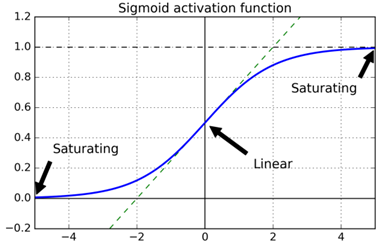

In [1]:
from IPython.display import Image
Image('figures/sigmoid.png',width=400)
# Source: "Hands-on machine learning with 
#scikit-learn and tensorflow" by Geron Aurelien

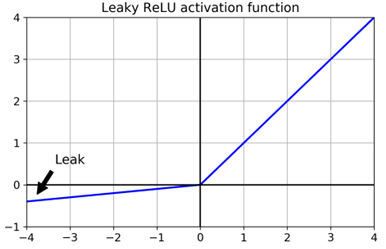

In [2]:
Image('figures/leaky_relu.png',width=400)
# Source: "Hands-on machine learning with 
#scikit-learn and tensorflow" by Geron Aurelien

* Current research has investigated different approaches to selecting the right slope for negative values. Namely, considering it a learnable parameter during training. This is known as the parametric leaky ReLU.

An alternative is to use the **Scaled Exponential Linear Unit, or SELU**. The output of each layer will tend to preserve mean 0 and standard deviation 1 during training, which solves the vanishing gradient problem.

The **Exponential Linear Unit (ELU)** is defined as:
\begin{align*}
\phi(x) = \begin{cases}x, & x> 0\\ \alpha(e^x-1), & x\leq 0\end{cases}
\end{align*}

typical values for $\alpha$ are $0.1\leq\alpha\leq 0.3$.

The **Scaled Exponential Linear Unit (SELU)** is defined as:
\begin{align*}
\phi(x) = \lambda\begin{cases}x, & x> 0\\ \alpha(e^x-1), & x\leq 0\end{cases}
\end{align*}

The [authors](https://arxiv.org/pdf/1706.02515.pdf) proposed to consider $\alpha\approx 1.6733$ and $\lambda \approx 1.0507$. When using this activation function in practice, one must use *Lecun Normal* for weight initialization, and if dropout wants to be applied, one should use *AlphaDropout*. More on this later in the code section.

In general we have the following relationship between the different activation function options:

> #### SELU > ELU > Leaky ReLU (and its variants) > ReLU > tanh > sigmoid

To use the leaky ReLU activation function, create a model just after the layer you want to apply it to: 

In [49]:
model = keras.models.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(negative_slope=0.2),
    keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])

For SELU activation, set ```activation="selu"``` and ```kernel_initializer="lecun_normal"``` when creating a layer: 

In [50]:
layer = keras.layers.Dense(10, activation='selu', 
                           kernel_initializer='lecun_normal')

## 1.3. Batch Normalization

The other popular approach for alleviating the vanishing gradient problem is to use **batch normalization**, first published in 2015.

* The technique consists of adding an operation in the model just before or after the activation function of each hidden layer, simply **zero-centering and normalizing each input then scaling and shifting the result** using two new learnable parameter vectors per layer: one for scaling, the other for shifting.

In other words, this operation lets the model learn the optimal scale and mean of each of the layer's inputs. 

In many cases, if you add a batch normalization layer as the very first layer of your neural network, you do not need to standardize your training set: the batch normalization layer will do it for you. Well, approximately, since it only looks at one batch at a time, and it can also rescale and shift each input feature.

Just add a ```BatchNormalization``` layer before or after each hidden layer's activation function, and optionally add a batch normalization layer as well as the first layer in your model:

In [51]:
model = keras.models.Sequential([ 
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(10, activation='softmax') 
])

In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

The authors of the Batch Normalization (BN) paper argued in favor of adding the BN layers before the activation functions, rather than after (as we just did). There is some debate about this, as which is preferable seems to depend on the task - you can experiment with this too to see which option works best on your dataset. 

To add the BN layers before the activation functions, you must remove the activation function from the hidden layers and add them as separate layers after the BN layers. 

Moreover, since a Batch Normalization layer includes one offset parameter per input, you can remove the bias term from the previous layer (just pass use_bias=False when creating it):

In [53]:
model = keras.models.Sequential([ 
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False), 
    keras.layers.BatchNormalization(), 
    keras.layers.Activation('elu'), 
    keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False), 
    keras.layers.BatchNormalization(), 
    keras.layers.Activation('elu'), 
    keras.layers.Dense(10, activation='softmax') 
])

In [ ]:
model.summary()

## 1.4. Gradient Clipping

Another popular technique to mitigate the exploding gradients problem is to clip the gradients during backpropagation so that they never exceed some threshold. This is called **Gradient Clipping**. 

This technique is most often used in recurrent neural networks (RNNs), as Batch Normalization is tricky to use in RNNs. For other types of networks, BN is usually sufficient. In ```Keras```, implementing Gradient Clipping is just a matter of setting the ```clipvalue``` or ```clipnorm``` argument when creating an optimizer, like this:

In [54]:
optimizer = keras.optimizers.SGD(clipvalue=1.0) 

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer)

This optimizer will clip every component of the gradient vector to a value between $-1.0$ and $1.0$.

---

# 2. Transfer Learning

It is generally not a good idea to train a very large deep neural network architecture from scratch. Specially if you have limited computational resources and/or a small training dataset.

Instead, you should always try to find an **existing neural network that accomplishes a similar task** to the one you are trying to tackle, then just **reuse the lower layers of this network**: this is called **transfer learning**. It will not only speed up training considerably but will also require much less training data. 

* For example, suppose that you have access to a Deep Neural Network (DNN) that was trained to classify pictures into 100 different categories, including animals, plants, vehicles, and everyday objects. You now want to train a DNN to classify specific types of vehicles. These tasks are very similar, even partly overlapping, so you should try to reuse parts of the first network.

The **output layer of the original model should usually be replaced since it is most likely not useful at all for the new task**, and it may not even have the right number of outputs for the new task. 

Similarly, the upper hidden layers of the original model are less likely to be as useful as the lower layers, since the high-level features that are most useful for the new task may differ significantly from the ones that were most useful for the original task. Try freezing all the reused layers first, then train your model and see how it performs. Then try unfreezing one or two of the top hidden layers to let backpropagation tweak them and see if performance improves. 

* The more training data you have, the more layers you can unfreeze. 

It is also useful to reduce the learning rate when you unfreeze reused layers: this will avoid wrecking their fine-tuned weights.

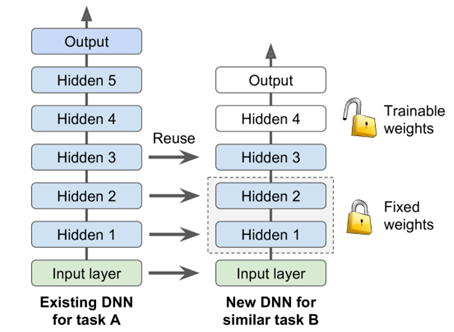

In [3]:
Image('figures/transfer_learning.png',width=400)
# Source: "Hands-on machine learning with scikit-learn and tensorflow" by Geron Aurelien

---

# 3. Faster Optimizers

## 3.1. Gradient Descent with Momentum

Momentum optimization was first **introduced in 1964**. Recall that Gradient Descent simply updates the weights theta by directly subtracting the gradient of the cost function multiplied by the learning rate:

$$\theta^{(t+1)} \leftarrow \theta^{(t)} - \eta\nabla J(\theta^{(t)})$$

Momentum optimization cares a great deal about what previous gradients were. At each iteration, it subtracts the local gradient from the momentum vector $m$ (multiplied by the learning rate), and it updates the weights by simply adding this momentum vector. In other words, the gradient is used for acceleration, not for speed. 

$$m^{(t+1)}\leftarrow \beta m^{(t)} - \eta \nabla J(\theta^{(t)})$$

$$\theta^{(t+1)} \leftarrow \theta^{(t)} + m^{(t+1)}$$

To simulate some sort of friction mechanism and prevent the momentum from growing too large, the algorithm introduces a new hyperparameter $\beta$, simply called the **momentum**, which must be set between 0 (high friction) and 1 (no friction). A **typical momentum value is 0.9**.

* Momentum optimization will roll down the valley faster and faster until it reaches the bottom (the optimum). In deep neural networks that don't use Batch Normalization, the upper layers will often end up having inputs with very different scales, so using Momentum optimization helps a lot. It can also help roll past local optima.

Implementing momentum optimization in ```Keras``` just use the optimizer ```SGD``` and set its momentum hyperparameter:

In [55]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

One small variant to Momentum optimization, called **Nesterov Accelerated Gradient or NAG**, proposed by Nesterov in 1983, is almost always faster than vanilla Momentum optimization. NAG measures the gradient of the cost function not at the local position but slightly ahead in the direction of the momentum, as seen in this picture. Making the convergence even faster than standard momentum.

$$m^{(t)} \leftarrow \theta^{(t)} + \mu (\theta^{(t)} - \theta^{(t-1)})$$

$$\theta^{(t+1)} \leftarrow \beta m^{(t)} - \eta \nabla J(m^{(t)})$$

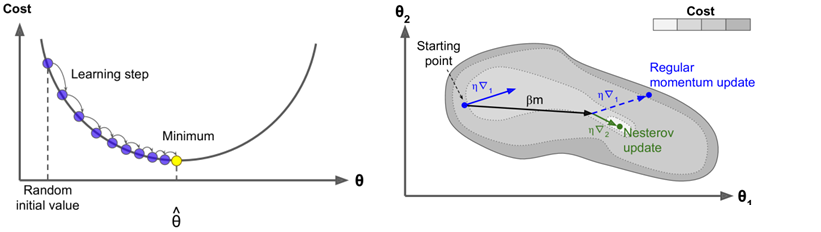

In [4]:
Image('figures/momentum.png',width=900)
# Source: "Hands-on machine learning with scikit-learn and tensorflow" by Geron Aurelien

In [56]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## 3.2. Gradient Descent with Adaptive Learning Rate

In addition to being able to speed up Gradient Descent, we can also **update the learning rate** to perform larger or smaller updates depending on their importance.

$$\Delta w_{ij}^{(t)} = - \eta^{(t)} \nabla J(w_{ij}^{(t)})$$

* **AdaGrad ([Adaptive Gradient algorithm, 2011](https://jmlr.org/papers/volume12/duchi11a/duchi11a.pdf))**: It simply allows the learning rate to decrease based on the parameters of the network. So it makes big updates for infrequent parameters, and small updates for frequent parameters. For this reason, it is well-suited for dealing with sparse data. Its main weakness is that its learning rate is always decreasing and decaying.

* **RMSProp ([Root Mean Squared Progagation algorithm, 2012](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)):** RMSProp is also a method in which the learning rate is adapted for each of the parameters in the network. The idea is to divide the learning rate for a parameter by a running average of the magnitudes of recent gradients for that weight.

* **Adam ([Adaptive Moment Estimation, 2015](https://arxiv.org/abs/1412.6980)):** Adam combines RMSProp and momentum learning. It is by far the most common method used today. Adam also computes adaptive learning rates for each parameter of the network. In this optimization algorithm, running averages of both the gradients and the second moments of the gradients are used.

**Adam**, or **Adaptive Moment Estimation**, was introduced in 2015. Adam is currently the standard optimization learning algorithm for training deep neural networks as it combines the ideas of **momentum optimization and adaptive learning rate**.

* Just like Momentum optimization it keeps track of an exponentially decaying average of past gradients, and it keeps track of an exponentially decaying average of past squared gradients.

Since Adam is an adaptive learning rate algorithm, it requires less tuning of the learning rate hyperparameter. You can often use the default value of eta equal to $\eta=0.001$, making Adam even easier to use than Gradient Descent.

**Nesterov Adam or Nadam** optimization, [introduced in 2016](https://openreview.net/pdf/OM0jvwB8jIp57ZJjtNEZ.pdf), is simply Adam optimization plus the Nesterov trick, so it will often converge slightly faster than Adam.

In [57]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [58]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## 3.3. Learning Rate Scheduler

One approach is to start with a large learning rate and divide it by 3 until the training algorithm stops diverging. You will not be too far from the optimal learning rate, which will learn quickly and converge to good solution.

However, you can do better than a constant learning rate: if you start with a high learning rate and then reduce it once it stops making fast progress, you can reach a good solution faster than with the optimal constant learning rate. There are many different strategies to reduce the learning rate during training. These strategies are called learning schedules. Some examples include:
1. Power scheduling, where you set the learning rate to a function of the iteration number $t$,

\begin{align*}
\eta(t) = \eta_0 / (1+t/s)^c
\end{align*}

where $c$ is typically set to $c=1$, $t$ is the iteration number and the steps $s$ are hyperparameters.

2. exponential scheduling, and
3. piecewise constant scheduling.

Implementing power scheduling with ```Keras```, set the ```decay``` hyperparameter when creating an optimizer:

In [59]:
# example polynomial scheduler
power_lr_scheduler = keras.optimizers.schedules.PolynomialDecay(initial_learning_rate=0.01,
                                                                decay_steps=10000,
                                                                end_learning_rate=0.0001,
                                                                power=1.0,
                                                                cycle=False)

In [60]:
# example exponential scheduler
exp_lr_scheduler = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01,
                                                          decay_steps=10000,
                                                          decay_rate=0.9)

In [61]:
optimizer = keras.optimizers.SGD(learning_rate=power_lr_scheduler)

#or
# optimizer = keras.optimizers.SGD(learning_rate=exp_lr_scheduler)

The ```decay``` is the inverse of $s$ (the number of steps it takes to divide the learning rate) and the value for $c$ is set to default $c=1$.

---

# 4. Avoid Overfitting Through Regularization

## 4.1. L1 and L2 Regularization

Deep neural networks typically have tens of thousands of parameters, sometimes even millions. With so many parameters, the network has an incredible amount of freedom and can fit a huge variety of complex datasets. But this great flexibility also means that it is prone to overfitting the training set. 

* Regularization constraints model parameters from becoming too large

**Ridge regularizer** or **L2-Norm** adds the term $\lambda\sum_{i=1}^M w_i^2$ to the cost function during training, where $\lambda$ controls tradeoff between minimizing error term and penalty term in cost function.

**Lasso regularizer** or **L1-Norm** adds the term $\lambda\sum_{i=1}^M |w_i|$. The Lasso regularizer promotes **sparsity** of the weight vector.

**Elastic Net** adds the term $\beta\lambda\sum_{i=1}^M |w_i| + \frac{1-\beta}{2}\lambda\sum_{i=1}^M w_i^2$.

In [63]:
layer = keras.layers.Dense(100, 
                           activation='elu',
                           kernel_initializer='he_normal', 
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [64]:
layer = keras.layers.Dense(100, 
                           activation='elu',
                           kernel_initializer='he_normal', 
                           kernel_regularizer=keras.regularizers.l1(0.01))

In [65]:
layer = keras.layers.Dense(100, 
                           activation='elu',
                           kernel_initializer='he_normal', 
                           kernel_regularizer=keras.regularizers.l1_l2(0.01))

## 4.2. Dropout

There are several strategies for network pruning which include:
* **Network Growing**: Start with a small MLP and add to it when unable to meet design specifications

* **Network Pruning**: Start with a large MLP and prune it by eliminating weights (driving them to zero)

* **Complexity Regularization**: Need an appropriate trade-off between reliability of training data and goodness of the model/NN architecture.

Dropout is one of the most popular regularization techniques for deep neural net works. It was proposed by Geoffrey Hinton in 2012. 

It is a fairly simple algorithm: at every training step, every neuron (including the input neurons, but always excluding the output neurons) has a probability p of being temporarily "dropped out," meaning it will be entirely ignored during this training step, but it may be active during the next step. The hyperparameter p is called the dropout rate, and it is typically set to 50%. 

After training, neurons don't get dropped anymore. That's it!

Neurons trained with dropout cannot co-adapt with their neighboring neurons; they have to be as useful as possible on their own. They also cannot rely excessively on just a few input neurons; they must pay attention to each of their input neurons. They end up being less sensitive to slight changes in the inputs. In the end you get a more robust network that generalizes better.

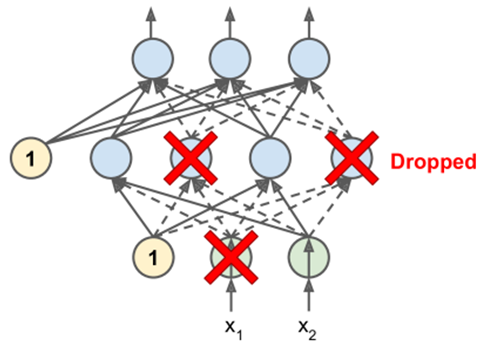

In [5]:
Image('figures/dropout.png',width=500)
# Source: "Hands-on machine learning with scikit-learn and tensorflow" by Geron Aurelien

In [66]:
model = keras.models.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(), 
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'), 
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'), 
    keras.layers.Dropout(rate=0.2), 
    keras.layers.Dense(10, activation='softmax') 
])

In [67]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, t_train, epochs=10, 
                    validation_data=(X_valid, t_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6310 - loss: 1.0335 - val_accuracy: 0.8200 - val_loss: 0.5141
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7839 - loss: 0.6001 - val_accuracy: 0.8384 - val_loss: 0.4635
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8017 - loss: 0.5459 - val_accuracy: 0.8424 - val_loss: 0.4524
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8116 - loss: 0.5260 - val_accuracy: 0.8502 - val_loss: 0.4309
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8176 - loss: 0.5022 - val_accuracy: 0.8572 - val_loss: 0.4127
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8236 - loss: 0.4800 - val_accuracy: 0.8620 - val_loss: 0.4027
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8224 - loss: 0.4832 - val_accuracy: 0.8628 - val_loss: 0.3928
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8266 - loss: 0.4707 - 

* If you observe that the model is overfitting, you can increase the dropout rate. 

* Conversely, you should try decreasing the dropout rate if the model underfits the training set. 

* It can also help to increase the dropout rate for large layers, and reduce it for small ones. 

* Moreover, many state-of-the-art architectures only use dropout after the last hidden layer, so you may want to try this if full dropout is too strong.

## 4.3. Early Stopping Criteria

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. As you can see in this figure, as the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set. However, after a while the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. 

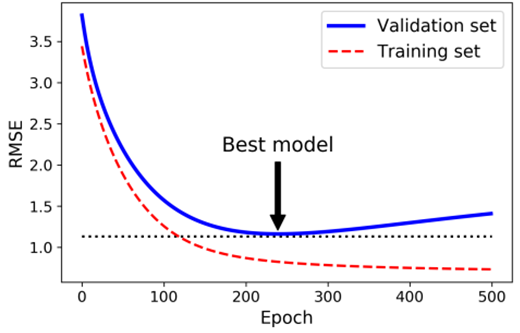

In [6]:
Image('figures/early_stopping.png',width=400)
# Source: "Hands-on machine learning with scikit-learn and tensorflow" by Geron Aurelien

This approach may result in a premature termination of learning.

an alternative is to consider the backpropagation algorithm to have converged when the Euclidean norm of the gradient vector reaches a sufficiently small threshold. However, learning may take a long time and it requires computation the norm of the gradient vector.

In [68]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                         patience=3, 
                                         restore_best_weights=True)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

In [69]:
optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')

history = model.fit(X_train, t_train, epochs=10, 
                    validation_data=(X_valid, t_valid),
                    callbacks=[callback])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6819 - loss: 1.0208 - val_accuracy: 0.7336 - val_loss: 0.7172
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7315 - loss: 0.7866 - val_accuracy: 0.7932 - val_loss: 0.5790
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7455 - loss: 0.7592 - val_accuracy: 0.8328 - val_loss: 0.5277
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7483 - loss: 0.7610 - val_accuracy: 0.8262 - val_loss: 0.5336
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7506 - loss: 0.7421 - val_accuracy: 0.7768 - val_loss: 0.5665
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7514 - loss: 0.7625 - val_accuracy: 0.7964 - val_loss: 0.6044


___

# 5. Online/Stochastic, Batch and Mini-Batch Learning

The number of samples used to perform a single training iteration (forward pass + backward pass) will impact the results.

* **Online Learning** (or stochastic/sequential learning): uses one sample to update the parameters of the network.
* **Batch Learning:** uses the entire training set to update the parameters of the network.

Another way to successfully train a deep neural network is to use **mini-bath learning**. 

* As a contrast, batch learning uses the entire training data to make changes on the model parameters by using the average gradient value. The **convergence of batch learning is smooth**, as you can see in the figure below, **but it is very slow**.

* In Stochastic or **Online learning**, we use a single training instance at a time to compute the gradient and use gradient descent to make changes on the model's parameters. The **convergence for online learning is random**, by nature, so it will be **erratic** as it becomes sensitive to small differences between training instances.

**Mini-batch learning is a good compromise between the two other learning strategies**. At each step, instead of computing the gradients based on the full training set (as in Batch) or based on just one instance (as in Stochastic), Minibatch computes the gradients on small random sets of instances called minibatches. The main advantage of Mini-batch over Stochastic is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

Common mini-batch sizes are 32, 64 and 128.

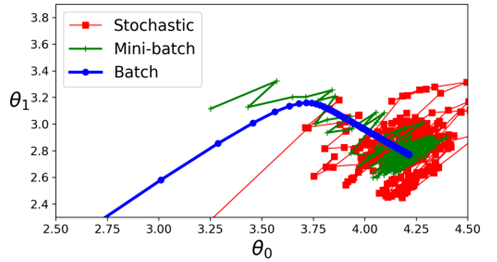

In [7]:
Image('figures/mini-batch.png',width=400)
# Source: "Hands-on machine learning with scikit-learn and tensorflow" by Geron Aurelien

In [ ]:
history = model.fit(X_train, t_train, epochs=10, batch_size=1,
                    validation_data=(X_valid, t_valid))

___

# 6. Determining Whether to Gather More Data

After the first end-to-end system is established, it is time to measure the performance of the algorithm and determine how to improve it. It is often much better to gather more data than to improve the learning algorithm (or first model of choice).

How does one decide whether to gather more data?

1. Determine whether the performance on the training set is acceptable. If performance on the training set is poor, the learning algorithm is not using the training data that is already available, so there is no reason to gather more data. 
    * Instead, try adding complexity to the model by adding more layers or adding more hidden units to each layer. 
    * Also, try improving the optimization algorithm, for example by tuning the learning rate. 
    * If more complex models and carefully tuned optimization algorithms do not work well, then the problem might be the *quality* of the training data. The data may be too noisy or may not include the right inputs needed to predict the desired outputs. This suggests starting over, collecting cleaner data, or collecting a richer set of features.

2. If the performance on the training set is acceptable, then measure the performance on a test set. If the performance on the test set is also acceptable, then there is nothing left to be done. If test set performance is much worse than training set performance, then gathering more data is one of the most effective solutions. In some applications, gathering more data is simply infeasible or impossible. 
    * A simple alternative to gathering more data is to reduce the size of the model or improve regularization, by adjusting hyperparameters such as weight decay coefficients,or by adding regularization strategies such as dropout. 
    * If you find that the gap between train and test performance is still unacceptable even after tuning the regularization hyperparameters, then gathering more data is advisable.
    
3. When deciding whether to gather more data, it is also necessary to decide how much to gather. It is helpful to plot curves showing the relationship between training set size and generalization error. 
    * You can experiment with training set sizes on a logarithmic scale, for example, doubling the number of examples between consecutive experiments.

---
---
---

# Deep Learning

Until the late 2000s, the broader class of systems that fell under the label **machine learning** heavily relied on **feature engineering**. Features are transformations on input data that result in numerical features that facilitate a downstream algorithm, like a classifier, to produce correct outcomes on new data. Feature engineering is aimed at taking the original data and coming up with representations of the same data that can then be fed to an algorithm to solve a problem.

**Deep learning**, on the other hand, deals with finding such representations automatically, from raw data, in order to successfully perform a task. This is not to say that **feature engineering** has no place with deep learning; we often need to inject some form of prior knowledge in a learning system. However, the ability of a neural network to ingest data and extract useful representations on the basis of examples is what makes deep learning so powerful. The focus of deep learning practitioners is not so much on hand-crafting those representations, but on operating on a mathematical entity so that it discovers representations from the training data autonomously. Often, these automatically-created features are better than those that are hand-crafted! As with many disruptive technologies, this fact has led to a change in perspective.

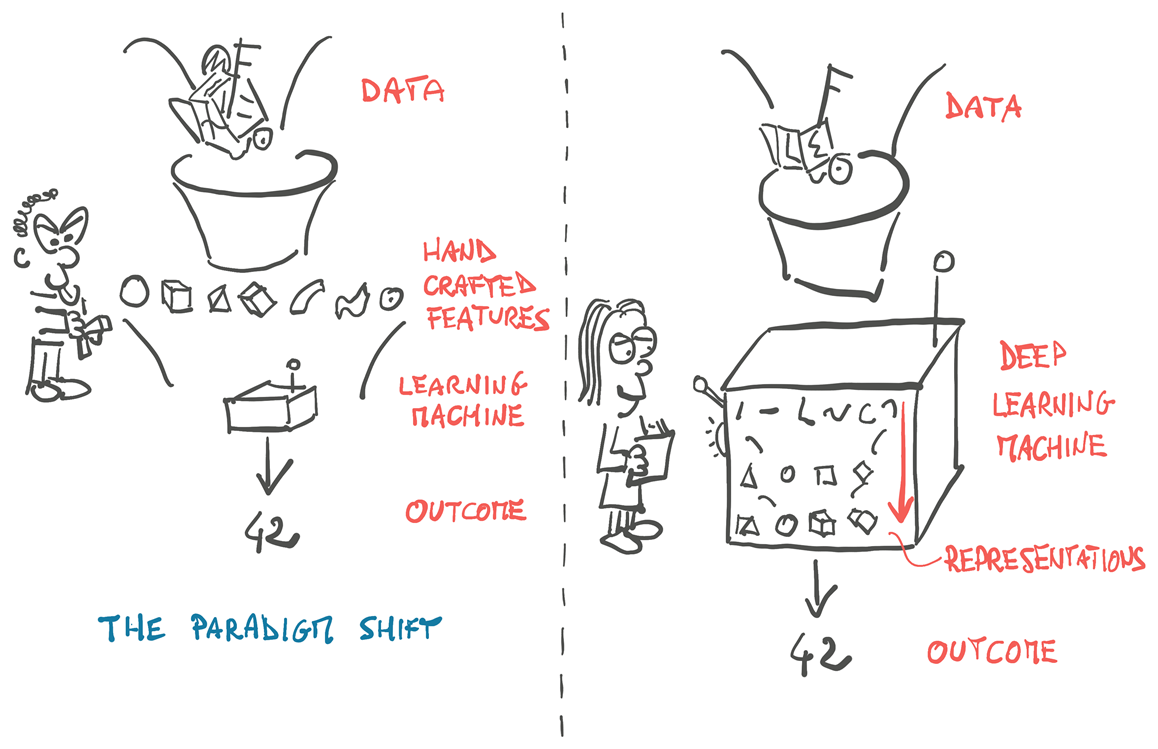

In [8]:
Image('figures/deeplearning.png', width=700)
#Source: "Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.

At the core of **deep learning** are **neural networks** with *many* layers (hence the *deep* architecture), mathematical entities capable of representing complicated functions through a composition of simpler functions.

# Brief History of Convolutional Neural Networks (CNNs or ConvNets)

### 1950-1962 Hubel & Wiesel - Neural Basics of Visual Perception

* Introduced the Neural Basics of Visual Perception, https://www.youtube.com/watch?v=IOHayh06LJ4&t=3s

* https://www.youtube.com/watch?v=8VdFf3egwfg

* Won the 1981 Nobel Prize for Physiology or Medicine

* Hubel, D. H., & Wiesel, T. N.: Receptive fields of single neurones in the cat's striate cortex. The Journal of physiology, 148(3), 574-591 (1959).

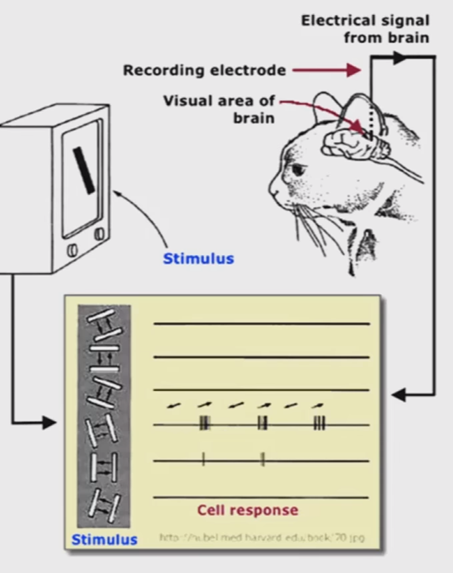

In [9]:
Image('figures/Hubel_and_Wiesel.png', width=400)

### 1980 Fukushima - Neocognitron

* Kunihiko Fukushima introduces **Neocognitron**, inspired by the work of Hubel & Wiesel. 
* Neocognitron introduced the basic layers of convolutional networks: convolutional layers and downsampling layers.

* Fukushima, K. Neocognitron: A self-organizing neural network model for a mechanism of pattern recognition unaffected by shift in position. Biol. Cybernetics 36, 193–202 (1980).

<!-- ![Fukushima1980](https://www.researchgate.net/profile/Kunihiko-Fukushima-2/publication/336163445/figure/fig1/AS:809198191398912@1569939291177/The-architecture-of-the-neocognitron.png) -->

### 1987 Waibel - Time Delay Neural Network (TDNN)

* First convolutional network was the **Time Delay Neural Network (TDNN)** introduced by Alex Waibel, it achieved shift invariance and it was trained with Backpropagation, using the same hierarchical structure of the Neocognitron. 

* TDNNs are convolutional networks that share weights along the temporal dimension.

* Waibel, Alex: Phoneme Recognition Using Time-Delay Neural Networks. Meeting of the Institute of Electrical, Information and Communication Engineers (IEICE). Tokyo, Japan (1987).

<!-- ![TDNN](https://upload.wikimedia.org/wikipedia/commons/3/3b/TDNN_Diagram.png) -->

### 1989 Hampshire & Waibel - Variant of TDNN with two-dimensional convolution

* As TDNNs operated on spectrograms, this two-dimensional convolution variant allows for the phoneme recognition system to both shift in time and in frequency. 

* This inspired translation invariance in image processing with convolutional networks.

* Hampshire, J.B and Waibel, A.: Connectionist Architectures for Multi-Speaker Phoneme Recognition. Advances in Neural Information Processing Systems, Morgan Kaufmann (1990).

### 1990 Yamaguchi - Max-Pooling

* Fixed filtering operation that calculates and propagates the maximum value of a given region.

* Yamaguchi, K.; Sakamoto, K.; Akabane, T.; Fujimoto, Y.: A Neural Network for Speaker-Independent Isolated Word Recognition. First International Conference on Spoken Language Processing, 1077-1980 (1990).

### 1989 LeCun - Convolution Neural Networks (CNNs)

* Introduced a CNN-based system to recognize hand-written ZIP Code numbers.

* The first system involved convolutions in which the kernel coefficients had been laboriously hand designed.

* Later, LeCun designed a system that used backpropagation to learn the convolution kernel coefficients directly from images, completely automatic.

* Y. LeCun, B. Boser, J. S. Denker, D. Henderson, R. E. Howard, W. Hubbard, L. D. Jackel: Backpropagation Applied to Handwritten Zip Code Recognition, AT&T Bell Laboratories (1989).

### 2004 GPU Breakthrough

* In 2004, it was shown by K. S. Oh and K. Jung that standard neural networks can be greatly accelerated on GPUs. Their implementation was 20 times faster than an equivalent implementation on CPU.

* Many other successes...

$\vdots$

### 2012 Krizhevsky - ImageNet Competition

* A GPU-based CNN won the "ImageNet Large Scale Visual Recognition Challenge 2012".

* A very deep CNN with over 100 layers by Microsoft won the ImageNet 2015 contest.

* Krizhevsky, Alex; Sutskever, Ilya; Hinton, Geoffrey E.: ImageNet classification with deep convolutional neural networks. Communications of the ACM. 60 (6): 84–90 (2017).

$\vdots$

---

# Convolutional Neural Networks (CNNs or ConvNets)

In the last few years, **Convolutional Neural Networks (CNNs)** have become popular in the areas of image recognition, object detection, segmentation, and many other tasks in the field of computer vision. They are also becoming popular in the field of **natural language processing (NLP)**.

The fundamental difference between fully connected layers and convolution layers is the way the weights are connected to each other in the intermediate layers.

One of the biggest challenges of using a linear layer or fully connected layers for computer vision is that they lose all spatial information, and the complexity in terms of the number of weights used by fully connected layers is too big. For example, when we represent a $224\times 224$ color image as a flat array, we would end up with $150 528$-dimensional feature vector ($224 \times 224 \times 3$). When the image is flattened, we lose all the spatial information.

There is a better way! It consists in replacing the dense, fully-connected affine transformation in our neural network unit with a different linear operation: **convolution**.

## Why convolution?

Convolutions are very common operations. Here are some image processing examples:

* **Edge Detection:** can detect edges by convolving with edge masks (e.g., the Sobel edge detectors)

$$S_v = \left[\begin{array}{ccc}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{array}\right]$$

$$S_h = \left[\begin{array}{ccc}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{array}\right]$$

The vertical and horizontal Sobel edge masks.

* **Image Smoothing:** can smooth/blur images using a mean filter.

* **Unsharp Masking:** can sharpen imagery by subtracting a mean filtered image from the original.

* and many more...

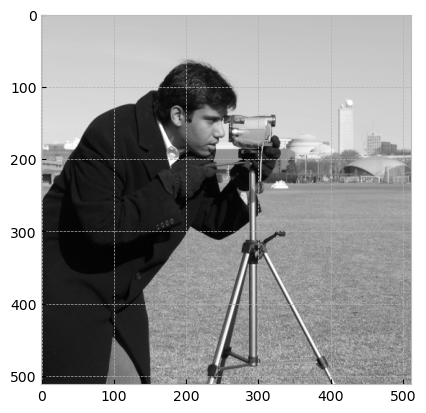

In [71]:
from skimage import data

# image = data.checkerboard()
image = data.camera()
# image = data.clock()
# image = data.coins()
# image = data.moon()
# image = data.text()
plt.imshow(image, cmap='gray');

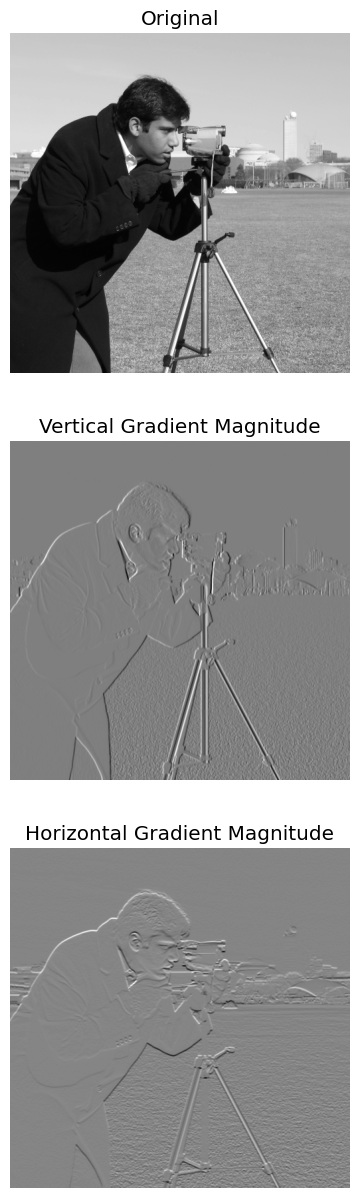

In [72]:
import scipy.signal as signal

vMask = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
hMask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

gradV = signal.convolve2d(image, vMask, boundary='symm', mode='same')
gradH = signal.convolve2d(image, hMask, boundary='symm', mode='same')

fig, (ax_orig, ax_mag, ax_mag2) = plt.subplots(3,1,figsize=(6,15))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title("Original")
ax_orig.set_axis_off()
ax_mag.imshow(gradV, cmap='gray')
ax_mag.set_title("Vertical Gradient Magnitude")
ax_mag.set_axis_off()
ax_mag2.imshow(gradH, cmap='gray')
ax_mag2.set_title("Horizontal Gradient Magnitude")
ax_mag2.set_axis_off()

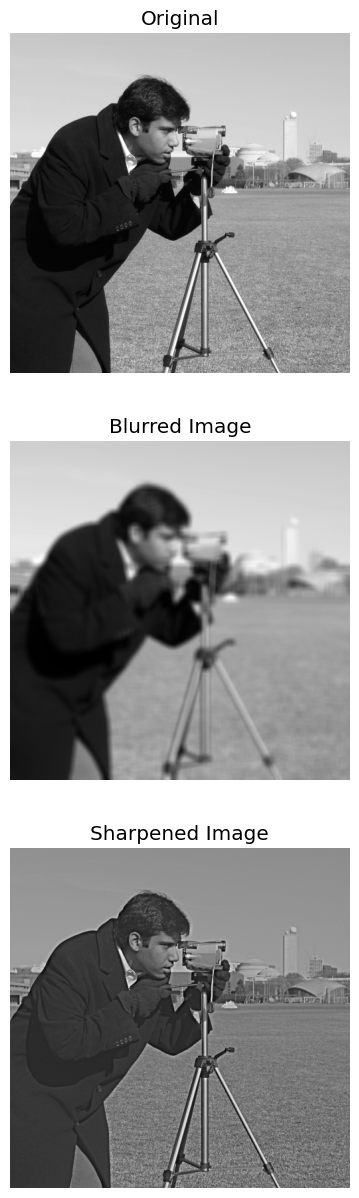

In [73]:
# Mean Filter Mask
mMask = (1/100)*np.ones((10,10))

# Blurring
blurI = signal.convolve2d(image, mMask, boundary='symm', mode='same')

# Unsharp Masking
sharpI = image + (image - blurI)

fig, (ax_orig, ax_mag, ax_mag2) = plt.subplots(3,1,figsize=(6,15))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title("Original")
ax_orig.set_axis_off()
ax_mag.imshow(blurI, cmap='gray')
ax_mag.set_title("Blurred Image")
ax_mag.set_axis_off()
ax_mag2.imshow(sharpI, cmap='gray')
ax_mag2.set_title("Sharpened Image")
ax_mag2.set_axis_off()

* So, various convolutions have the ability to enhance and extract features of interest.

* The idea behind a convolutional neural network is to learn the features needed to perform classification (or regression) during the learning process for the neural network. This is in contrast with approaches in which you first identify features of importance, extract them in advance, and then train a classifier (e.g., a neural network) on the extracted features.

**Example:** if we ought to recognize patterns corresponding to objects, like an airplane in the sky, we will likely need to look at how nearby pixels are arranged, and we would be less interested at how pixels that are far from each other appear in combination. Essentially, it doesn't matter if our image of a Spitfire has a tree or cloud or kite in the corner or not.

In order to translate this intuition in mathematical form, we could compute the weighted sum of a pixel with its immediate neighbors, rather than with all other pixels in the image. This would be equivalent to building weight matrices, one per output feature and output pixel location, in which all weights beyond a certain distance from a center pixel are zero. This will still be a weighted sum, i.e. a linear operation.

We would like these localized patterns to have an effect on the output no matter their location in the image, i.e. to be **translation-invariant**. 

To do that, we would need to force the weights in each per-output-pixel family of patterns to have same values, regardless of pixel location. To achieve this goal, we would need to initialize all weight matrices in a family with the same values, and, during back-propagation, average the gradients for all pixel locations and apply that average as the update to all weights in the family.

For this reason, CNNs are often called **shared weight neural networks**. This is because several connections in the network are tied together to have the same value.

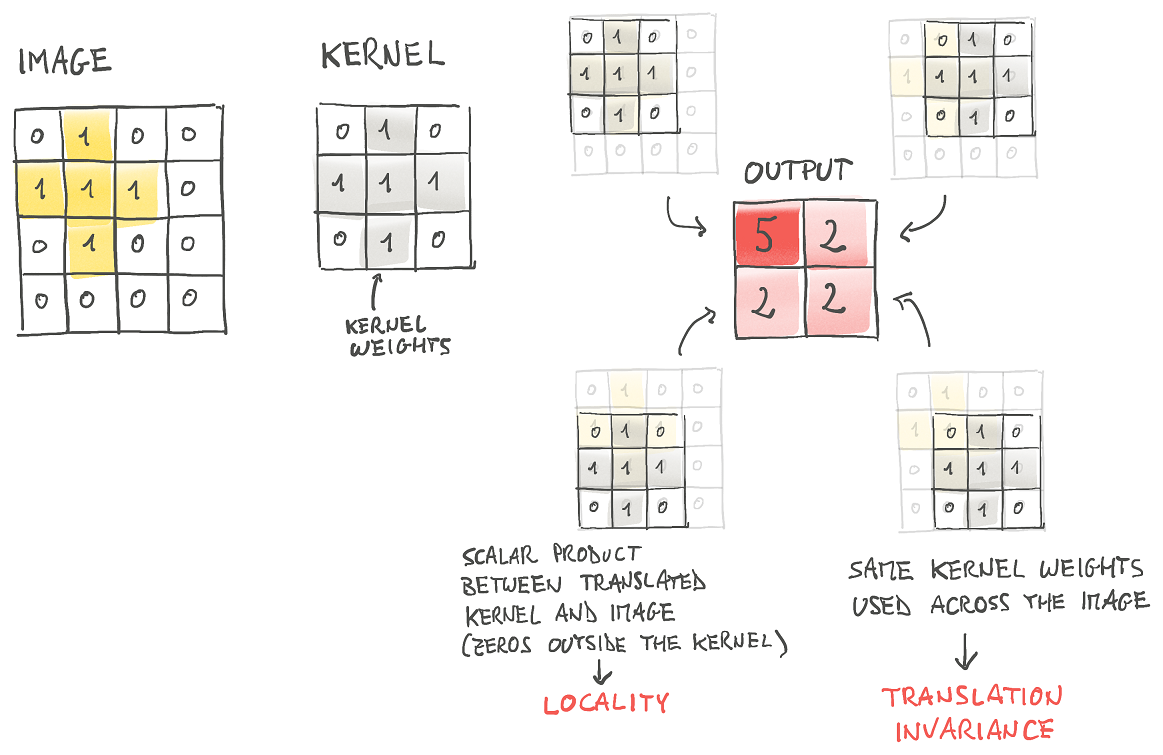

In [10]:
Image('figures/convolution.png', width=700)
#Source: "Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.

When we switch standard fully connected networks (MLPs) with CNNs, we get:

* local operations on neighborhoods
* translation-invariance
* models with a lot fewer parameters

## 1.2. Shared-weight Neural Networks

Consider a 2-D convolution (used, for example, in image processing):

$$g(x,y) \ast f(x,y) = \sum_{s=-a}^a \sum_{t=-b}^b g(s,t) f(x-s, y-t)$$

where $g$ is the filter and $f$ is the image to be convolved. Essentially, we flip both horizontally and vertically and, then, slide $g$ accross $f$ where at each location we perform a pointwise multiplication and then a sum.

To understand better how are we exactly creating a neural network that extracts features using convolution operations, we need to first consider that a convolutional can be written as a *linear operation* with a **doubly block circulant matrix**.

$$H(x,y) = F(x,y) \ast g(x,y)$$

is the same as

$$h = Gf$$

where $f$ and $h$ are the vectorized forms of $F$ and $G$ is a doubly block circulant matrix.

Consider the following small image:

$$Im = \left[\begin{array}{cccc}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8\\
9 & 10 & 11 & 12\\
13 & 14 & 15 & 16
\end{array}\right]$$

We can vectorize it and obtain:

$$I^T = [1,2,3,\dots, 14,15,16]$$

Let's consider the following kernel:

$$k = \left[\begin{array}{ccc}
-1 & -2 & -3\\
-4 & -5 & -6\\
-7 & -8 & -9
\end{array}\right]$$

Let $G$ be:

$$G = \left[\begin{array}{cccccccccccccccc}
-1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9 & 0 & 0 & 0 & 0 & 0\\
0 & -1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9\\
\end{array}\right]$$

So, we can write the convolution as the matrix multiplication:

$$GI$$

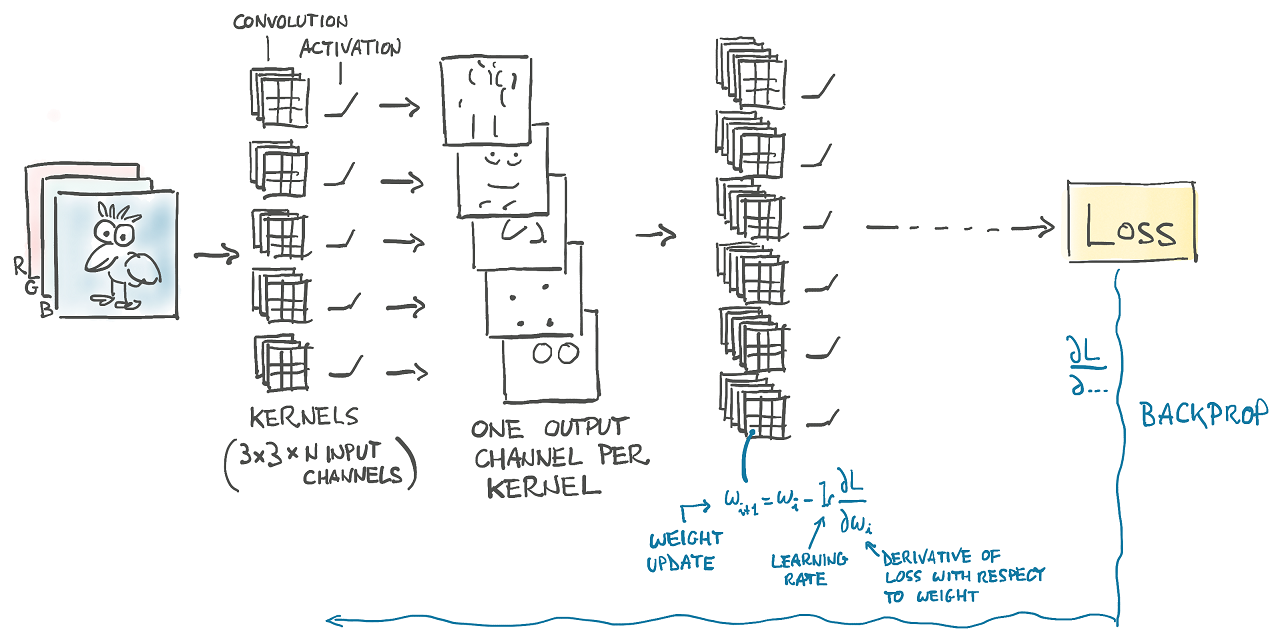

In [11]:
Image('figures/filters.png', width=700)
#Source: "Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.

## 1.3. Kernel/Filter Sizes

Small kernels, like $3 \times 3$ or $5 \times 5$ provide very local information. The problem is how do we know that big picture all structures in our images are 3 pixels or 5 pixels wide?

In order to identify larger objects in an image we will need large convolution kernels. Well, sure, at the limit we could get a
$32 \times 32$ kernel for a $32 \times 32$ image, but we would converge to the old fully connected, affine transformation and lose all the nice properties of convolution. 

Another option, which is what is used in convolutional neural networks, is stacking one convolution after the other, and at the same time downsampling the image in-between successive convolutions.

![CNNs](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/593px-Typical_cnn.png)

So, on one hand, the first set of kernels operates on small neighborhoods on first-order, low-level features, while the second set of kernels effectively operates on wider neighborhoods, producing features that are compositions of the previous features. This is a very powerful mechanism that provides convolutional neural networks with the ability to see into very complex scenes

## 1.4. Pooling Layers and Strides

Downsampling could in principle occur in different ways. Scaling an image by a half is the equivalent of taking 4 neighboring pixels in input and producing one pixel in output. How we compute the value of the output based on the values of the input is up to us. We could:

* **Average-pooling**: average the four pixels. This was a common approach early on, but has since fallen out of favor somewhat.
* **Max-pooling**: take the maximum of the four pixels. This is currently the most commonly used approach, but has a downside of discarding the other 3/4ths of the data.
* **Stride**: perform a strided convolution, where only every Nth pixel is calculated. A 3x4 convolution with stride 2 still incorporates input from all pixels from the previous layer. Current literature shows promise for this approach, but it has not yet supplanted maxpool.

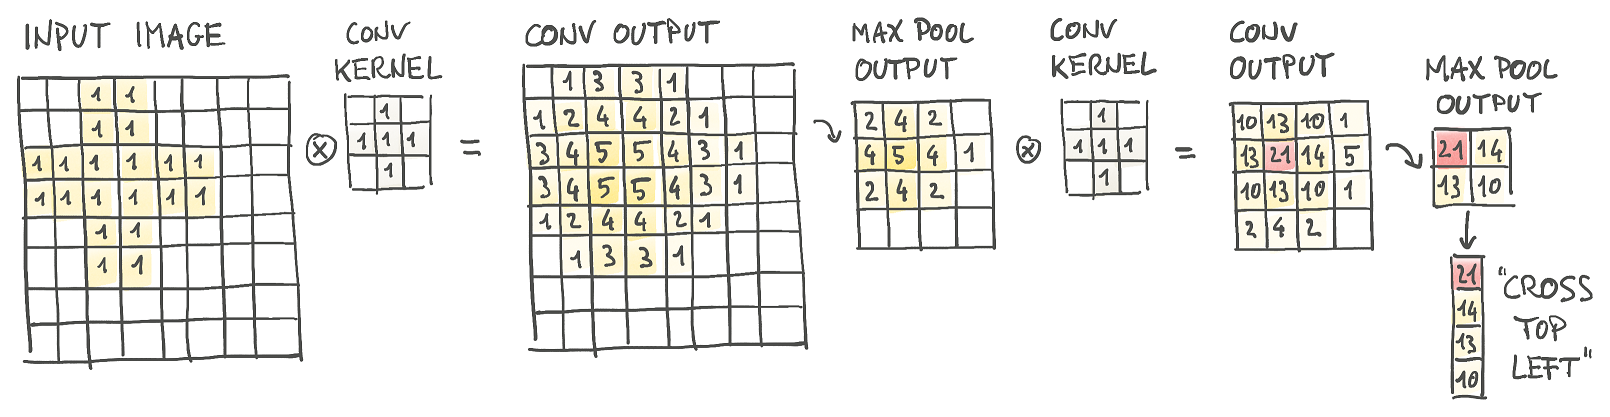

In [12]:
Image('figures/maxpooling.png', width=700)
#Source: "Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.

Intuitively, the output images from a convolution layer, especially since they are followed by an activation just like any other linear layer, will tend to have a high magnitude where certain features corresponding to the estimated kernel are detected (e.g. vertical lines). By keeping the highest value in the 2x2 neighborhood as the downsampled output, we ensure that the features that have been found survive the downsampling, at the expense of the weaker responses.

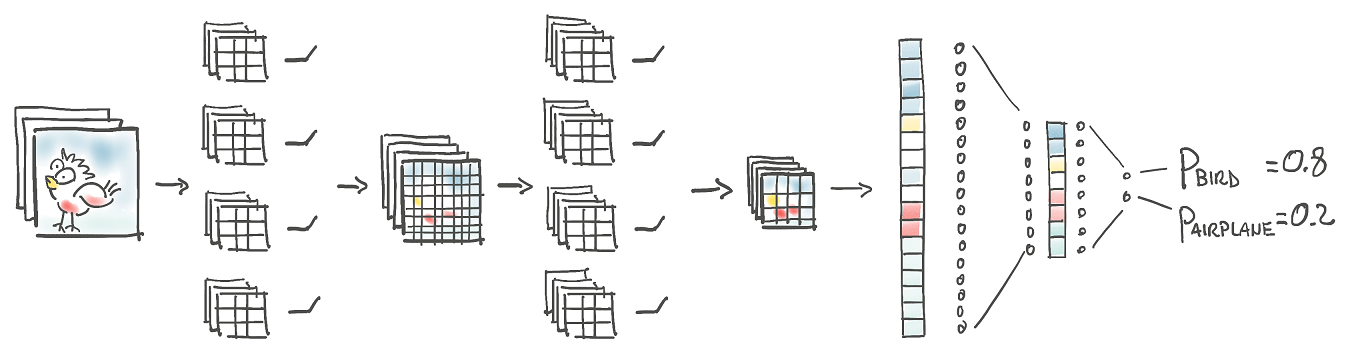

In [13]:
Image('figures/CNN.png', width=700)
#Source: "Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.

In deep learning, we let kernels get estimated from data, in a way that the discrimination is most effective. For instance, in terms of non-negative log likelihood of the output compared to ground truth. From this angle, the job of a convolutional neural network is to estimate the kernel of a set of filter banks in successive layers, that will transform a multi-channel image into another multi-channel image, where different channels will correspond to different features (e.g. one channel for the average, another channel for vertical edges, etc).

---

# TensorFlow Implementation

A 2D convolutional layer with ```tf.keras``` looks like:

In [ ]:
conv = keras.layers.Conv2D(filters=32, 
                           kernel_size=3, 
                           strides=1, 
                           padding='same', 
                           activation='relu') 

This code creates a ```Conv2D``` layer with 32 filters, each $3\times 3$, using a stride of 1 (both horizontally and vertically) and "same" padding, and applying the ReLU activation function to its outputs.

As you can see, convolutional layers have quite a few hyperparameters: you must choose the number of filters, their height and width, the strides, and the padding type. As always, you can use cross-validation to find the right hyperparameter values, but this is very time-consuming. We will discuss common CNN architectures later, to give you some idea of which hyperparameter values work best in practice.

---

### Memory Requirements

Another problem with CNNs is that the convolutional layers require a huge amount of RAM. This is especially true during training, because the reverse pass of backpropagation requires all the intermediate values computed during the forward pass. 

For example, consider a convolutional layer with $5\times 5$ filters, outputting 200 feature maps of size $150\times 100$, with stride 1 and "same" padding. If the input is a $150\times 100$ RGB image (three channels), then the number of parameters is ($5 \times 5 \times 3 + 1) \times 200 = 15,200$ (the + 1 corresponds to the bias terms), which is fairly small compared to a fully connected layer. However, each of the 200 feature maps contains $150\times 100$ neurons, and each of these neurons needs to compute a weighted sum of its $5\times 5\times 3 = 75$ inputs: that's a total of 225 million float multiplications. Not as bad as a fully connected layer, but still quite computationally intensive. Moreover, if the feature maps are represented using 32-bit floats, then the convolutional layer's output will occupy $200 \times 150 \times 100 \times 32 = 96$ million bits (12 MB) of RAM. 8 And that's just for one instance - if a training batch contains 100 instances, then this layer will use up 1.2 GB of RAM! 

During inference (i.e., when making a prediction for a new instance) the RAM occupied by one layer can be released as soon as the next layer has been computed, so you only need as much RAM as required by two consecutive layers. But during training everything computed during the forward pass needs to be preserved for the reverse pass, so the amount of RAM needed is (at least) the total amount of RAM required by all layers.

<div class="alert alert-warning">
   <strong>Memory Requirements:</strong> If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats. Or you could distribute the CNN across multiple devices.
</div>

---

## Pooling Layers

A pooling layer using a $2 \times 2$ kernel. The strides default to the kernel size, so this layer will use a stride of 2 (both horizontally and vertically). By default, it uses "valid" padding (i.e., no padding at all):

In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [ ]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)

## Building a CNN

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(64, 7, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(10, activation='softmax')
])

* The first layer uses 64 fairly large filters ($7 \times 7$) but only stride 1 because the input images are not very large. It also sets ```input_shape```$=[28, 28, 1]$, because the images are $28 \times 28$ pixels, with a single color channel (i.e., grayscale). 

* Next we have a max pooling layer which uses a pool size of 2, so it divides each spatial dimension by a factor of 2. 

* Then we repeat the same structure twice: two convolutional layers followed by a max pooling layer. For larger images, we could repeat this structure several more times (the number of repetitions is a hyperparameter you can tune). 

* Note that the number of filters grows as we climb up the CNN toward the output layer (it is initially 64, then 128, then 256): it makes sense for it to grow, since the number of low-level features is often fairly low (e.g., small circles, horizontal lines), but there are many different ways to combine them into higher-level features. It is a common practice to double the number of filters after each pooling layer: since a pooling layer divides each spatial dimension by a factor of 2, we can afford to double the number of feature maps in the next layer without fear of exploding the number of parameters, memory usage, or computational load. 

* Next is the fully connected network, composed of two hidden dense layers and a dense output layer. Note that we must flatten its inputs, since a dense network expects a 1D array of features for each instance. We also add two dropout layers, with a dropout rate of 50% each, to reduce overfitting.

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(learning_rate=0.01),
             metrics=['accuracy'])

In [ ]:
model.fit(X_train, t_train, epochs=5, batch_size=32,
         validation_data=(X_valid, t_valid),
         callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
y_test = np.argmax(model.predict(X_test), axis=1)

In [ ]:
model.evaluate(X_test, t_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(t_test, y_test)

---

# Classical Architectures

Over the years, variants of this fundamental architecture have been developed, leading to amazing advances in the field. A good measure of this progress is the error rate in competitions such as the ILSVRC [ImageNet challenge](https://www.image-net.org/challenges/LSVRC/). In this competition the top-five error rate for image classification fell from over 26% to less than 2.3% in just six years. The top-five error rate is the number of test images for which the system's top five predictions did not include the correct answer. The images are large (256 pixels high) and there are 1,000 classes, some of which are really subtle (try distinguishing 120 dog breeds). Looking at the evolution of the winning entries is a good way to understand how CNNs work. 

Let's look at the classical LeNet-5 architecture (1998), then three of the winners of the ILSVRC challenge: AlexNet (2012), GoogLeNet (2014), and ResNet (2015).

## LeNet-5 (1998)

The LeNet-5 architecture 10 is perhaps the most widely known CNN architecture. As mentioned earlier, it was created by Yann LeCun in 1998 and has been widely used for handwritten digit recognition (MNIST).

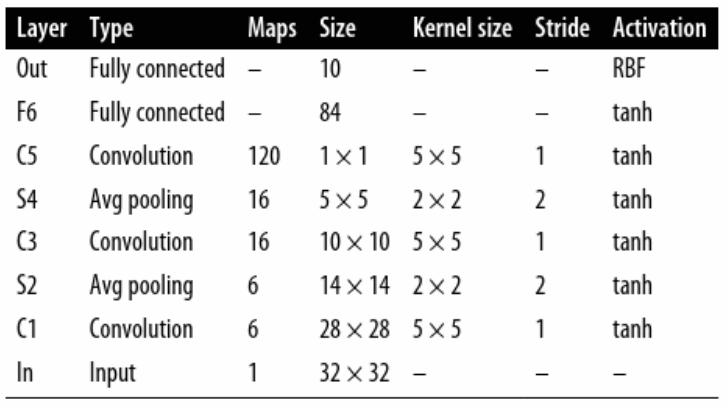

In [14]:
Image('figures/LeNet-5.png',width=500)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

## AlexNet (2012)

The AlexNet CNN architecture 11 won the 2012 ImageNet ILSVRC challenge by a large margin: it achieved a top-five error rate of 17%, while the second best achieved only 26%! It was developed by Alex Krizhevsky (hence the name), Ilya Sutskever, and Geoffrey Hinton. It is similar to LeNet-5, only much larger and deeper, and it was the first to stack convolutional layers directly on top of one another, instead of stacking a pooling layer on top of each convolutional layer. Table 14-2 presents this architecture.

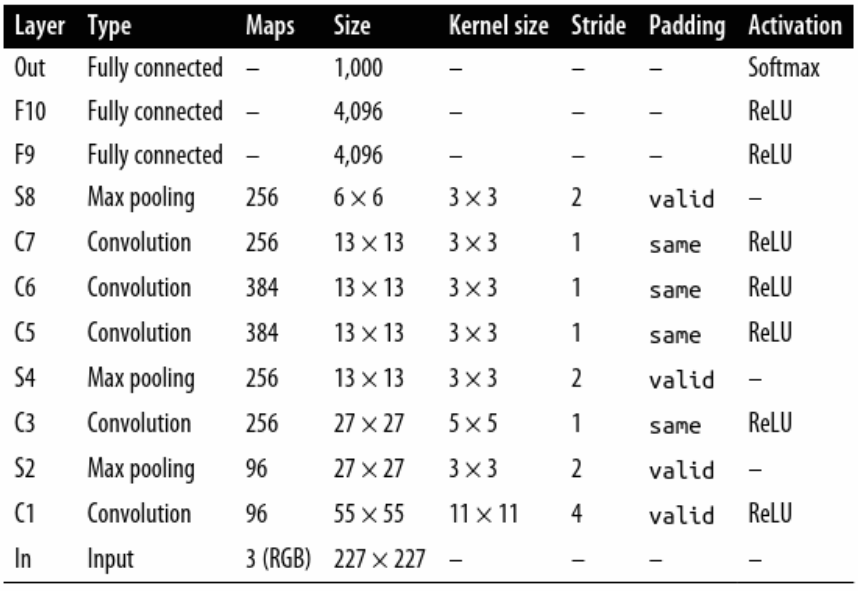

In [15]:
Image('figures/AlexNet.png',width=500)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

## GoogleNet (2014)

The GoogLeNet architecture was developed by Christian Szegedy et al. from Google Research, and it won the ILSVRC 2014 challenge by pushing the top-five error rate below 7%. This great performance came in large part from the fact that the network was much deeper than previous CNNs. This was made possible by subnetworks called **inception modules**, which allow GoogLeNet to use parameters much more efficiently than previous architectures: GoogLeNet actually has 10 times fewer parameters than AlexNet (roughly 6 million instead of 60 million). 

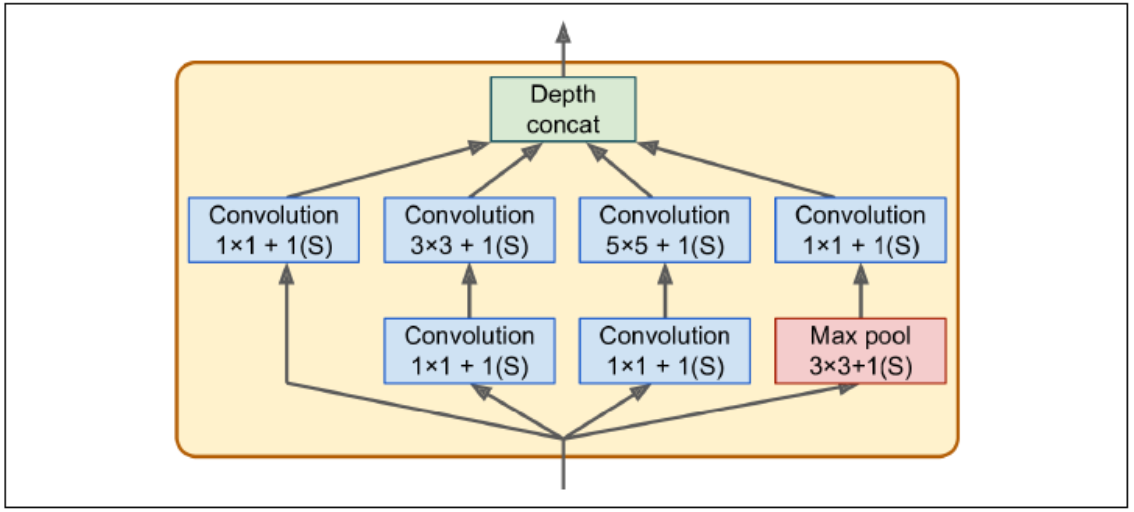

In [16]:
# Inception Module

Image('figures/inception_module.png',width=700)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

The notation $3 \times 3 + 1$(S) means that the layer uses a $3 \times 3$ kernel, stride 1, and "same" padding. 

* The input signal is first copied and fed to four different layers. All convolutional layers use the ReLU activation function. 

* The second set of convolutional layers uses different kernel sizes ($1 \times 1$, $3 \times 3$, and $5 \times 5$), allowing them to capture patterns at different scales. 

* Note that every single layer uses a stride of 1 and "same" padding (even the max pooling layer), so their outputs all have the same height and width as their inputs. This makes it possible to concatenate all the outputs along the depth dimension in the final depth concatenation layer (i.e., stack the feature maps from all four top convolutional layers). This concatenation layer can be implemented in TensorFlow using the ```tf.concat()``` operation, with axis=3 (the axis is the depth).

* Convolutional layers with $1 \times 1$ kernels cannot capture spatial patterns, but they can capture patterns along the depth dimension. Moreover, they are configured to output fewer feature maps than their inputs, so they serve as **bottleneck layers**, meaning they reduce dimensionality.

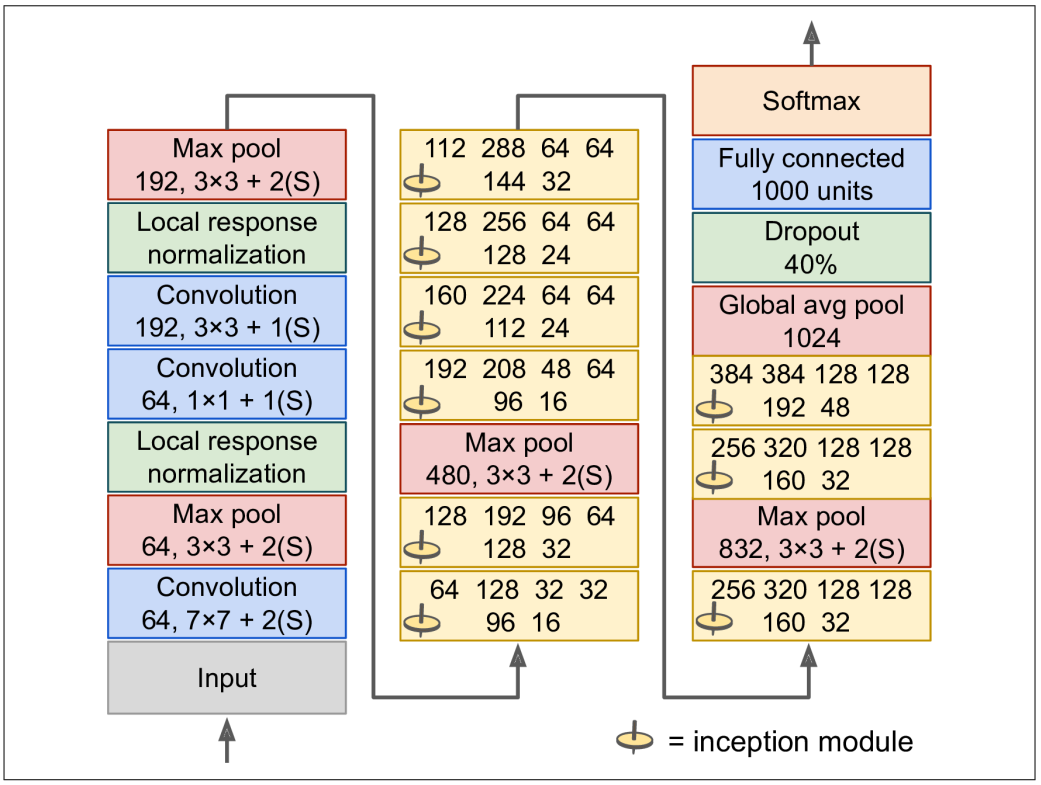

In [17]:
Image('figures/GoogleNet.png',width=700)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

Several variants of the GoogLeNet architecture were later proposed by Google researchers, including Inception-v3 and Inception-v4, using slightly different inception modules and reaching even better performance.

## VGGNet (2014)

The runner-up in the ILSVRC 2014 challenge was VGGNet, developed by Karen Simonyan and Andrew Zisserman from the Visual Geometry Group (VGG) research lab at Oxford University. It had a very simple and classical architecture, with 2 or 3 convolutional layers and a pooling layer, then again 2 or 3 convolutional layers and a pooling layer, and so on (reaching a total of just 16 or 19 convolutional layers, depending on the VGG variant), plus a final dense network with 2 hidden layers and the output layer. It used only $3 \times 3$ filters, but many filters.

## ResNet (2015)

Kaiming He et al. won the ILSVRC 2015 challenge using a Residual Network (or ResNet), that delivered an astounding top-five error rate under 3.6%. The winning variant used an extremely deep CNN composed of 152 layers (other variants had 34, 50, and 101 layers). It confirmed the general trend: models are getting deeper and deeper, with fewer and fewer parameters. 

The key to being able to train such a deep network is to use **skip connections** (also called *shortcut connections*): the signal feeding into a layer is also added to the output of a layer located a bit higher up the stack. 

Let's see why this is useful. When training a neural network, the goal is to make it model a target function $h(x)$. If you add the input $x$ to the output of the network (i.e., you add a skip connection), then the network will be forced to model $f(x) = h(x) - x$ rather than $h(x)$. This is called **residual learning**.

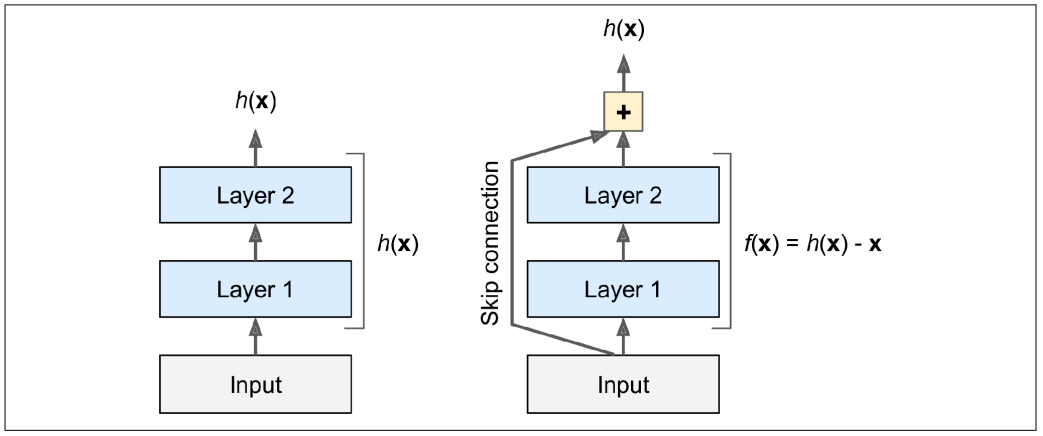

In [18]:
Image('figures/residual_learning.png',width=700)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

The ResNet architecture starts and ends exactly like GoogLeNet (except without a dropout layer), and in between is just a very deep stack of simple residual units. Each residual unit is composed of two convolutional layers (and no pooling layer!), with Batch Normalization (BN) and ReLU activation, using $3 \times 3$ kernels and preserving spatial dimensions (stride 1, "same" padding).

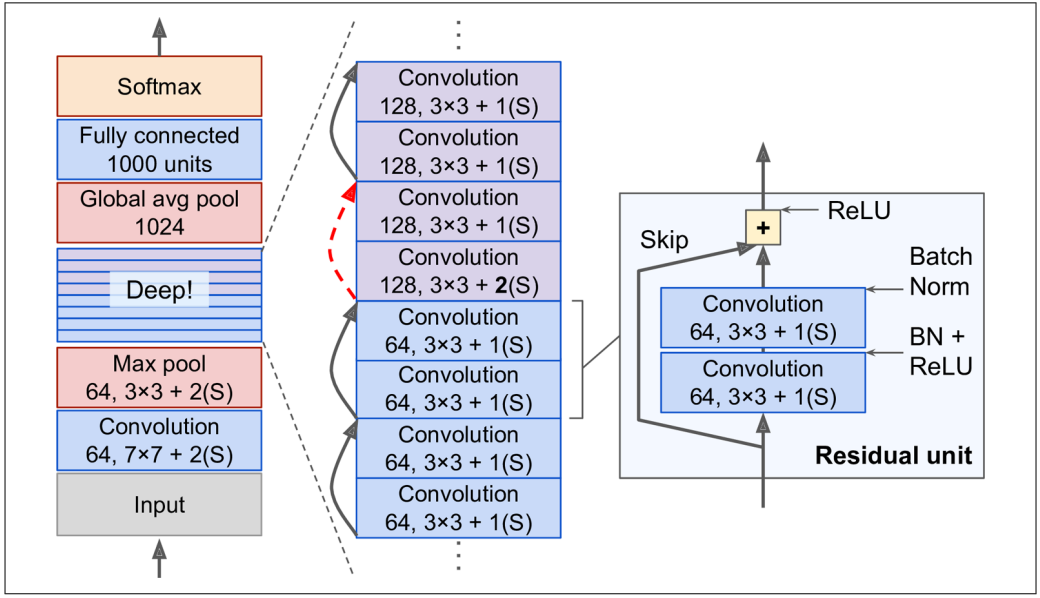

In [19]:
Image('figures/resnet_architecture.png',width=700)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

ResNet-34 is the ResNet with 34 layers (only counting the convolutional layers and the fully connected layer) containing 3 residual units that output 64 feature maps, 4 residual units (RUs) with 128 maps, 6 RUs with 256 maps, and 3 RUs with 512 maps.

## Xception (2016)

Another variant of the GoogLeNet architecture is worth noting: **Xception** (which stands for **Extreme Inception**) was proposed in 2016 by François Chollet (the author of Keras), and it significantly outperformed Inception-v3 on a huge vision task (350 million images and 17,000 classes). Just like Inception-v4, it merges the ideas of GoogLeNet and ResNet, but it replaces the inception modules with a special type of layer called a **depth-wise separable convolution layer** (or **separable convolution layer** for short). These layers had been used before in some CNN architectures, but they were not as central as in the Xception architecture. 

While a regular convolutional layer uses filters that try to simultaneously capture spatial patterns (e.g., an oval) and cross-channel patterns (e.g., mouth + nose + eyes = face), a **separable convolutional layer makes the strong assumption that spatial patterns and cross-channel patterns can be modeled separately** (see below).

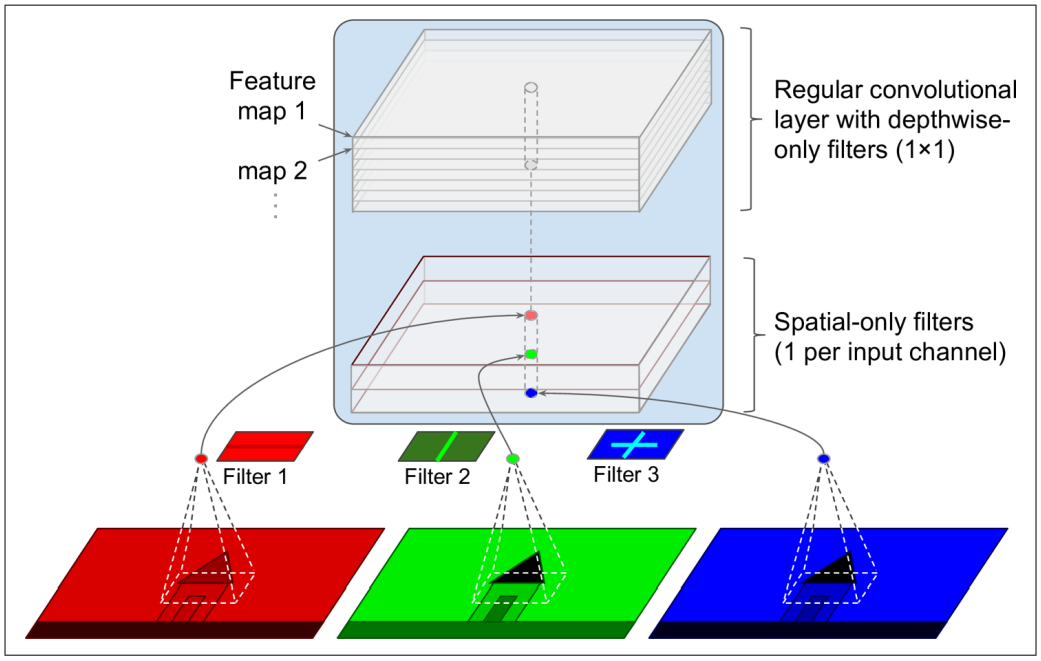

In [20]:
Image('figures/separable_convolutional_layer.png',width=700)
# Source: Aurélien Géron, "Hands-on machine learning with scikit-learn, keras and tensorflow"

Thus, it is composed of two parts: the first part applies a single spatial filter for each input feature map, then the second part looks exclusively for cross-channel patterns - it is just a regular convolutional layer with $1 \times 1$ filters.

---

# Autoencoders (AEs)

An autoencoder attempts to find efficient latent representations of the inputs, it then spits out something that (hopefully) looks very close to the inputs. 

An autoencoder is always composed of two parts: 

1. an **encoder** (or recognition network) that converts the inputs to a latent representation, followed by 

2. a **decoder** (or generative network) that converts the internal representation to the outputs.

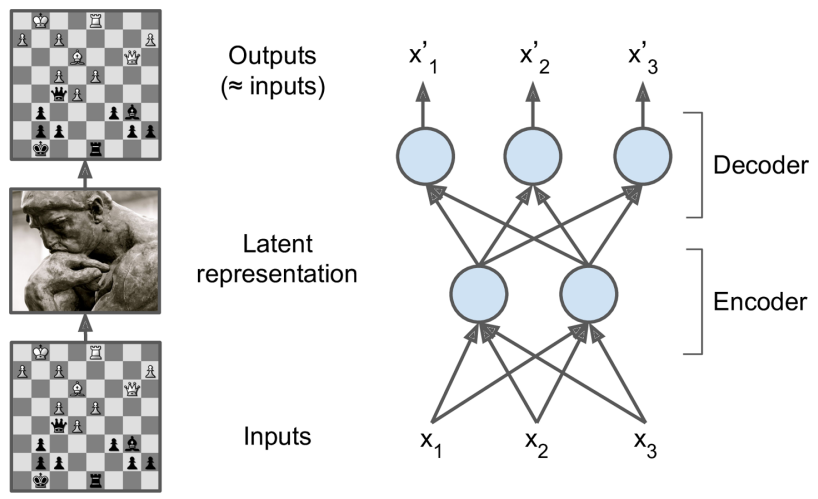

In [21]:
from IPython.display import Image
Image('figures/autoencoder.png',width=500)

As you can see, an autoencoder typically has the same architecture as a Multi-Layer Perceptron (MLP), except that the number of neurons in the output layer must be equal to the number of inputs. 

In this example, there is just one hidden layer composed of two neurons (the encoder), and one output layer composed of
three neurons (the decoder). The **outputs are often called the reconstructions** because the autoencoder tries to reconstruct the inputs, and the cost function contains a reconstruction loss that penalizes the model when the reconstructions are different from the inputs.

Because the **internal representation has a lower dimensionality** than the input data (it is 2D instead of 3D), the autoencoder is said to be **undercomplete**. An undercomplete autoencoder cannot trivially copy its inputs to the codings, yet it must find a way to output a copy of its inputs. It is forced to learn the most important features in the input data (and drop the unimportant ones).

## Autoencoder vs PCA (Linear Dimensionality Reduction)

If the autoencoder uses only linear activations and the cost function is the mean squared error (MSE), then it ends up performing Principal Component Analysis.

The following code builds a simple linear autoencoder to perform PCA on a 3D dataset, projecting it to 2D:

In [74]:
encoder = keras.models.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(2)
])

decoder = keras.models.Sequential([
    keras.layers.Dense(28*28),
    keras.layers.Reshape([28, 28])
])

autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss=keras.losses.MeanSquaredError, 
                    optimizer=keras.optimizers.SGD(learning_rate=0.1))

To perform simple PCA, we do not use any activation function (i.e., all neurons are linear), and the cost function is the MSE.

In [75]:
history = autoencoder.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - loss: 0.1222 - val_loss: 0.0630
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - loss: 0.0578 - val_loss: 0.0493
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - loss: 0.0485 - val_loss: 0.0487
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - loss: 0.0483 - val_loss: 0.0484
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - loss: 0.0480 - val_loss: 0.0482
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - loss: 0.0478 - val_loss: 0.0480
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - loss: 0.0477 - val_loss: 0.0479
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - loss: 0.0473 - val_loss: 0.0477
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - loss: 0.0471 - val_loss: 0.0476
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - loss: 0.0474 - val_loss: 0.0475
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - loss: 0.0471 - val_loss: 0.0474
Epoch 12

In [76]:
codings = encoder.predict(X_train)

codings.shape

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step


(55000, 2)

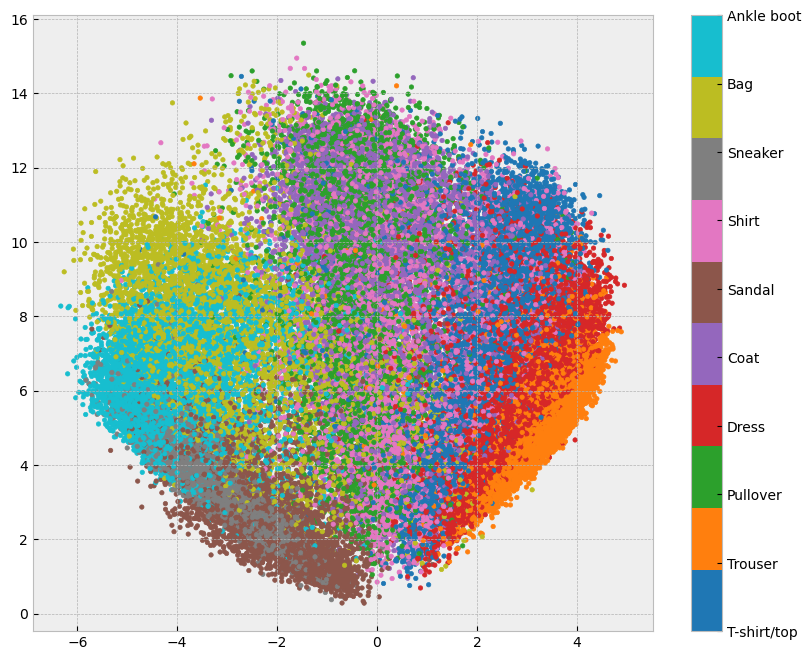

In [77]:
plt.figure(figsize=(10,8))
plt.scatter(codings[:,0], codings[:,1], c=t_train, s=10, cmap='tab10')
plt.rcParams['axes.grid'] = False
cbar = plt.colorbar(ticks=range(10))
cbar.ax.set_yticklabels(class_names);

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
codings_pca = pca.fit_transform(X_train.reshape(X_train.shape[0],28*28))

codings_pca.shape

(55000, 2)

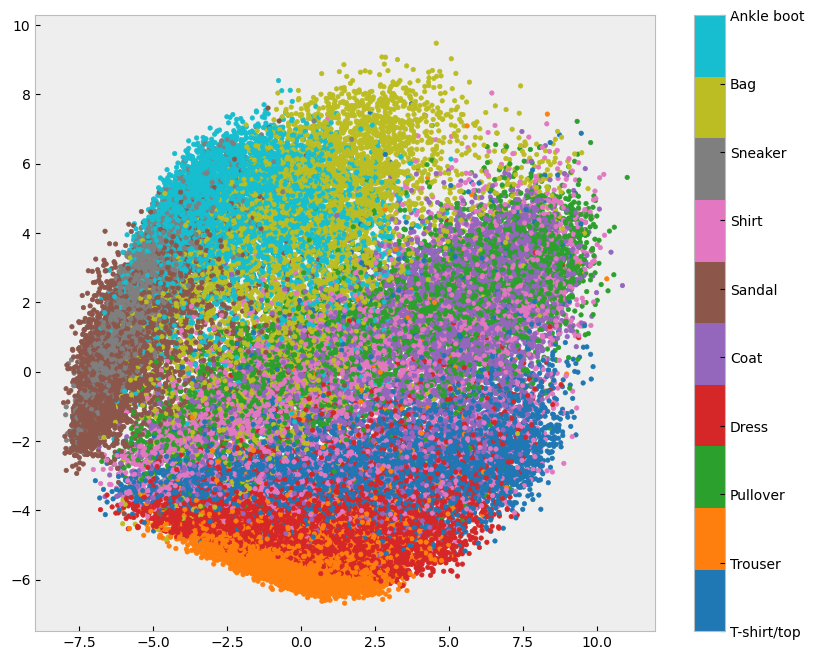

In [79]:
plt.figure(figsize=(10,8))
plt.scatter(codings_pca[:,0], codings_pca[:,1], c=t_train, s=10, cmap='tab10')
cbar = plt.colorbar(ticks=range(10))
cbar.ax.set_yticklabels(class_names);

---

# Stacked Autoencoders

Just like other neural networks we have discussed, autoencoders can have multiple hidden layers. In this case they are called **stacked autoencoders** (or **deep autoencoders**). Adding more layers helps the autoencoder learn more complex codings. 

The architecture of a stacked autoencoder is typically symmetrical with regard to the central hidden layer (the coding layer). 

For example, an autoencoder for the Fashion MNIST may have 784 inputs, followed by a hidden layer with 100 neurons, then a central hidden layer of 30 neurons, then another hidden layer with 100 neurons, and an output layer with 784 neurons:

In [80]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(28 * 28, activation='sigmoid'),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5))

history = stacked_ae.fit(X_train, X_train, epochs=10,
                         validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3850 - val_loss: 0.3181
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3101 - val_loss: 0.2990
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3007 - val_loss: 0.2941
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2964 - val_loss: 0.2913
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2935 - val_loss: 0.2893
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2917 - val_loss: 0.2877
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2906 - val_loss: 0.2865
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2885 - val_loss: 0.2854
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2877 - val_loss: 0.2843
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2881 - val_loss: 0.2834


When compiling the stacked autoencoder, we use the **binary cross-entropy loss** instead of the mean squared error. We are treating the reconstruction task as a multilabel binary classification problem: each pixel intensity represents the probability that the pixel should be black. Framing it this way (rather than as a regression problem) tends to make the model converge faster.

## Visualizing Reconstructions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


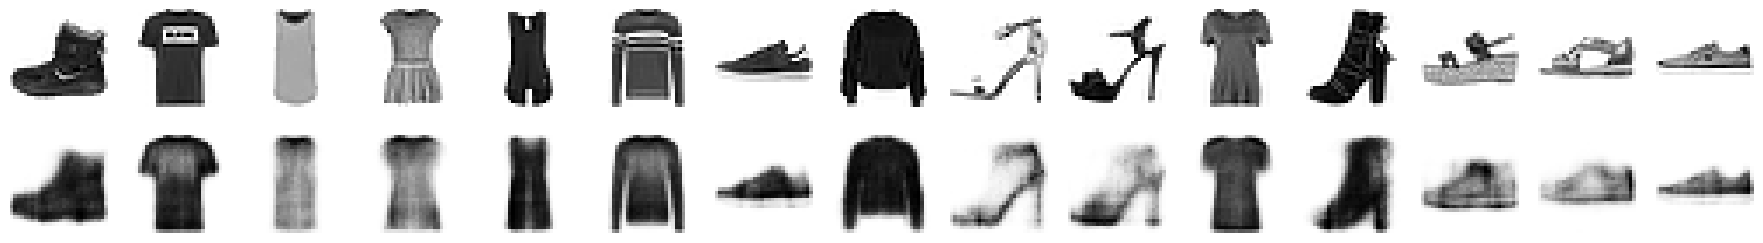

In [81]:
def plot_image(image):
    plt.imshow(image, cmap='binary')
    plt.axis('off')

def show_reconstructions(model, n_images=15):
    reconstructions = model.predict(X_valid[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_valid[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)

The reconstructions are recognizable, but a bit too lossy. 

* We may need to train the model for longer, or 
* make the encoder and decoder deeper, or 
* make the codings larger. 

But if we make the network too powerful, it will manage to make perfect reconstructions without having learned any useful patterns in the data.

---

# AE Applications

Autoencoders can be used for:

1. Standard dimensionality reduction or dimensionality reduction specifically for visualization (2-D or 3-D)

2. Unsupervised pretraining (a form of transfer learning)

3. Reduce number of tunable parameters (when using symmetrical AEs) 

---

## Dimensionality Reduction

Now that we have trained a stacked autoencoder, we can use it to reduce the dataset's dimensionality. 

For visualization (2-D or 3-D), this does not give great results compared to other dimensionality reduction algorithms, but one big advantage of autoencoders is that they can handle large datasets, with many samples and many features. So one strategy is to use an autoencoder to reduce the dimensionality down to a reasonable level, then use another dimensionality reduction algorithm for visualization.

Let's use this strategy to visualize Fashion MNIST. First, we use the encoder from our stacked autoencoder to reduce the dimensionality down to 30, then we use FLDA to reduce the dimensionality down to 2 for visualization.

In [82]:
X_valid_compressed = stacked_encoder.predict(X_valid)

X_valid_compressed.shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step


(5000, 30)

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca = PCA(n_components=2)

X_valid_2D_pca = pca.fit_transform(X_valid_compressed)

X_valid_2D_pca.shape

(5000, 2)

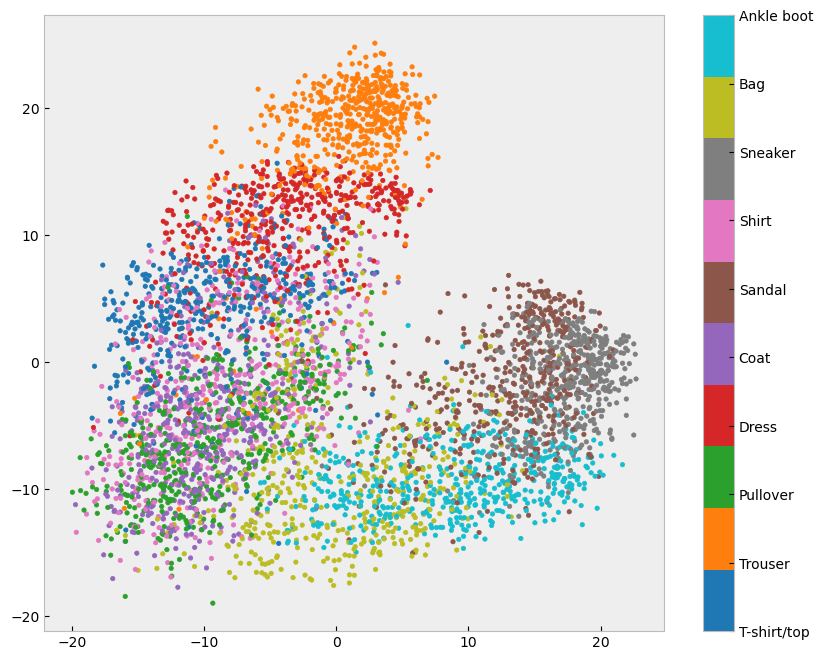

In [84]:
plt.figure(figsize=(10,8))
plt.scatter(X_valid_2D_pca[:, 0], X_valid_2D_pca[:, 1], 
            c=t_valid, s=10, cmap='tab10')

cbar = plt.colorbar(ticks=range(10))
cbar.ax.set_yticklabels(class_names);

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

X_valid_2D = lda.fit_transform(X_valid_compressed, t_valid)

X_valid_2D.shape

(5000, 2)

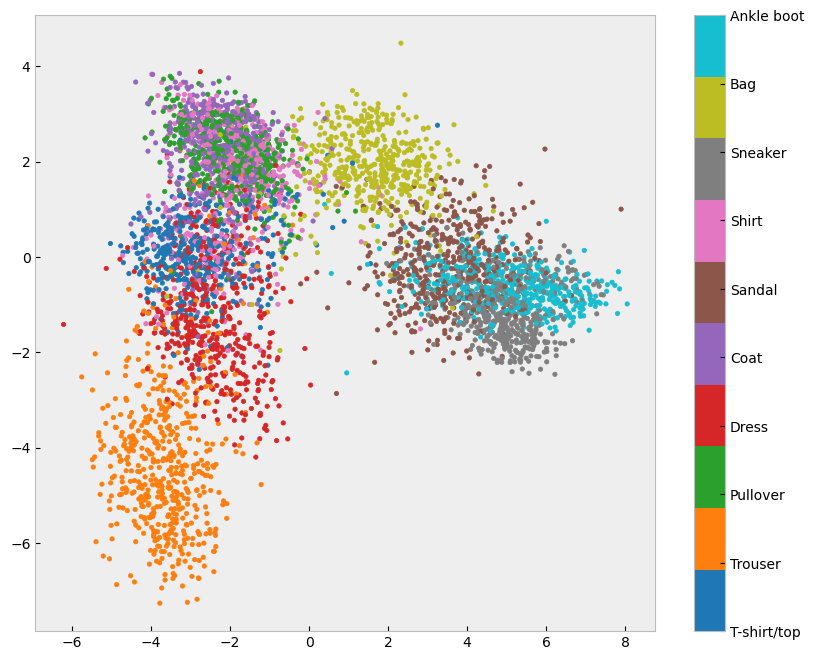

In [86]:
plt.figure(figsize=(10,8))
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], 
            c=t_valid, s=10, cmap='tab10')

cbar = plt.colorbar(ticks=range(10))
cbar.ax.set_yticklabels(class_names);

In [87]:
from matplotlib import offsetbox
def plot_components(data, model, labels=None, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data, labels)
    if labels is not None:
        ax.scatter(proj[:, 0], proj[:, 1], c=labels*1.0, cmap='tab10',s=10)
    else:
        ax.scatter(proj[:, 0], proj[:, 1], c='k', s=10)
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

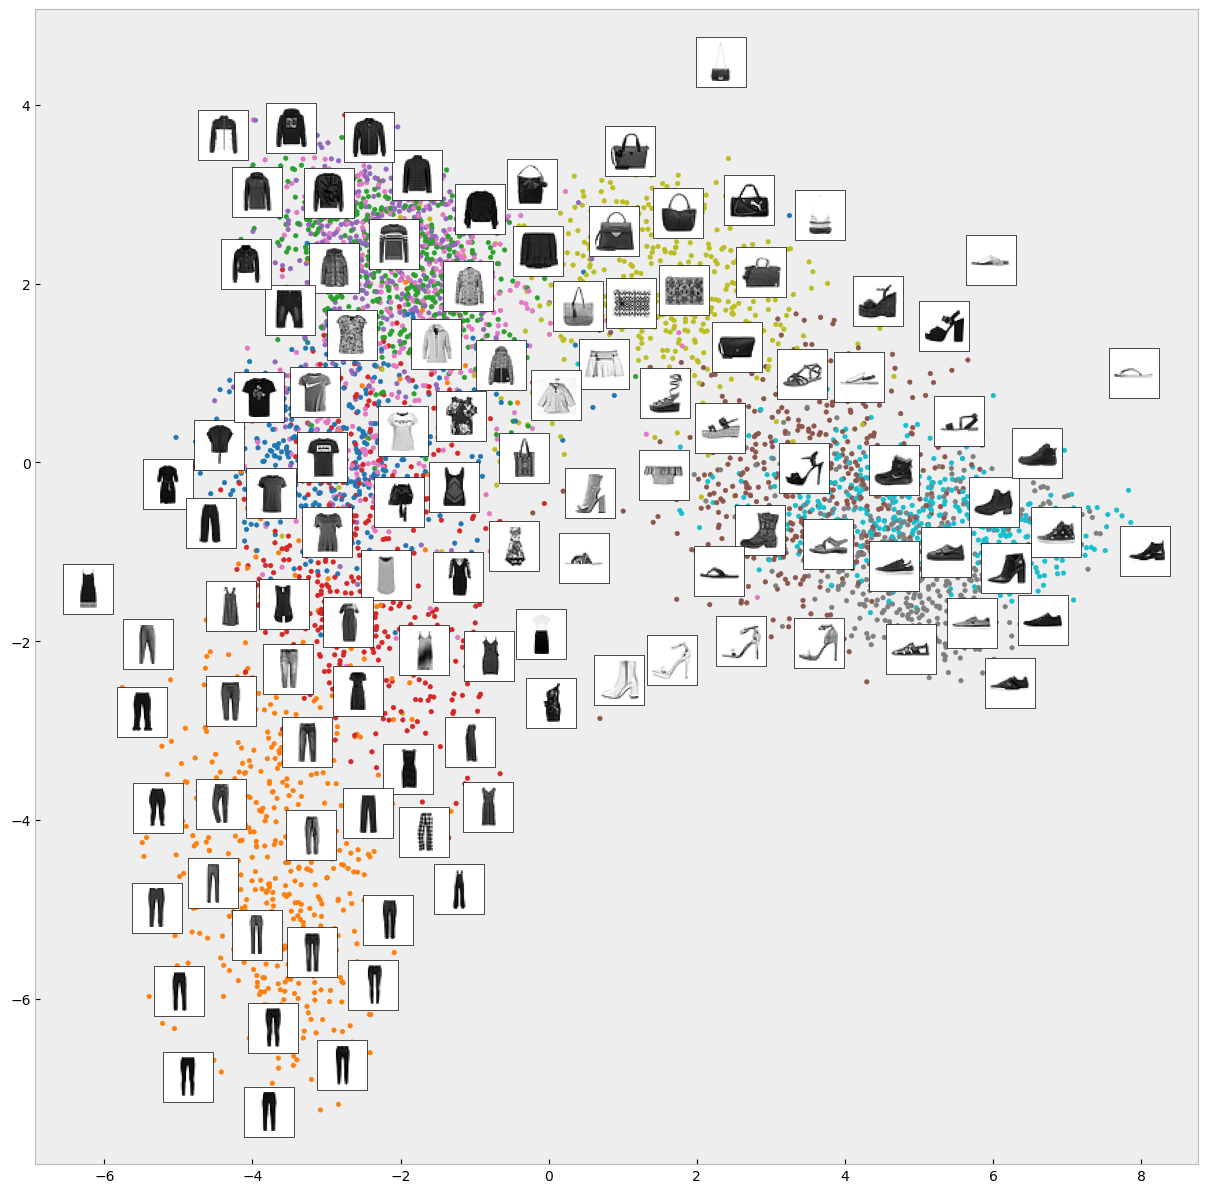

In [88]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_components(X_valid_compressed, lda, t_valid, images=X_valid,
                ax=ax, thumb_frac=0.05, cmap='binary')

---

## Unsupervised Pretraining Using Stacked Autoencoders

Very much like in the situation where you are tackling a complex supervised task but you do not have a lot of labeled training data, one solution is to find a neural network that performs a similar task and reuse its lower layers. This makes it possible to train a high-performance model using little training data because your neural network won't have to learn all the low-level features; it will just reuse the feature detectors learned by the existing network.

Similarly, if you have a large dataset but most of it is unlabeled, you can first train a stacked autoencoder using all the data, then reuse the lower layers to create a neural network for your actual task and train it using the labeled data. 

* When training the classifier, if you really don't have much labeled training data, you may want to freeze the pretrained layers (at least the lower ones).

* Building a large unlabeled dataset is often cheap (e.g., a simple script can download millions of images off the internet), but labeling those images (e.g., classifying them as flower species) can usually be done reliably only by humans. Labeling instances is time-consuming and costly, so it's normal to have only a few thousand human-labeled instances.

There is nothing special about the implementation: just train an autoencoder using all the training data (labeled plus unlabeled), then reuse its encoder layers to create a new neural network (see the exercises at the end of this chapter for an example).

---

## Tying Weights

When an autoencoder is neatly **symmetrical**, a common technique is to **tie the weights of the decoder layers to the weights of the encoder layers**. This halves the number of weights in the model, speeding up training and limiting the risk of overfitting. 

Let's define a custom layer:

In [ ]:
class DenseTranspose(keras.layers.Layer):
    
    def __init__(self, dense, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = keras.activations.get(activation)
    
    def build(self, batch_input_shape):
        input_dim = self.dense.kernel.shape[0]
        self.biases = self.add_weight(
            name='bias',
            initializer='zeros',
            shape=[input_dim])
        super().build(batch_input_shape)
    
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.kernel, transpose_b=True)
        return self.activation(z + self.biases)

In [ ]:
# Encoder
dense_1 = keras.layers.Dense(100, activation='selu')
dense_2 = keras.layers.Dense(30, activation='selu')

tied_encoder = keras.models.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    dense_1,
    dense_2
])

In [ ]:
# Tied Decoder

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation='selu'),
    DenseTranspose(dense_1, activation='sigmoid'),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

In [ ]:
tied_ae.compile(loss='binary_crossentropy',
                   optimizer=keras.optimizers.SGD(learning_rate=1.5))

history = tied_ae.fit(X_train, X_train, epochs=10,
                         validation_data=[X_valid, X_valid])

This model achieves a very slightly lower reconstruction error than the previous model, with almost half the number of parameters.

---

## Training One Autoencoder at a Time

Rather than training the whole stacked autoencoder in one go like we just did, it is possible to **train one shallow autoencoder at a time**, then stack all of them into a single stacked autoencoder (hence the name). This technique is not used as much these days, but you may still run into papers that talk about **_greedy layerwise training_**, so it's good to know what it means.

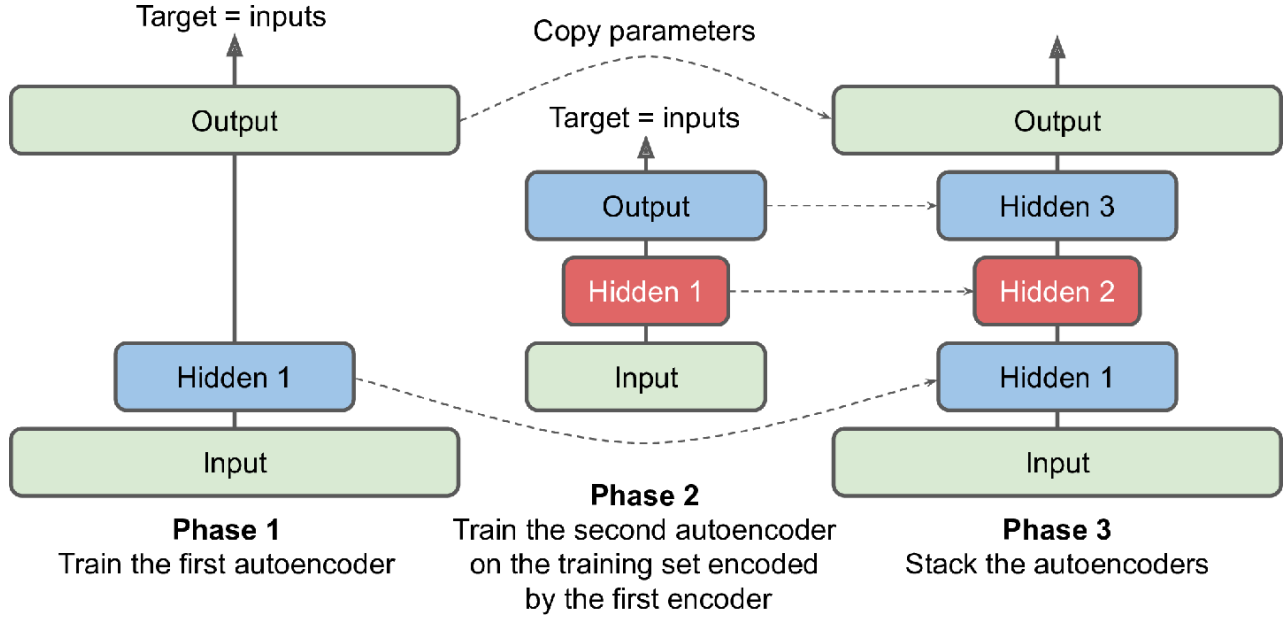

In [22]:
Image('figures/training_one_ae_at_a_time.png',width=700)

As we discussed earlier, one of the triggers of the current tsunami of interest in Deep Learning was the discovery in 2006 by [Geoffrey Hinton et al.](https://www.cs.toronto.edu/~hinton/absps/ncfast.pdf) that deep neural networks can be pretrained in an unsupervised fashion, using this greedy layerwise approach. They used restricted Boltzmann machines (RBMs) for this purpose, but in 2007 [Yoshua Bengio et al. showed](https://proceedings.neurips.cc/paper/2006/file/5da713a690c067105aeb2fae32403405-Paper.pdf) that autoencoders worked just as well. 

For several years this was the only efficient way to train deep nets, until many of the techniques introduced in Chapter 11 made it possible to just train a deep net in one shot.

Autoencoders are not limited to dense networks: you can also build convolutional autoencoders, or even recurrent autoencoders. Let's look at these now.

---

# Convolutional Autoencoders

If you want to build an autoencoder for images (e.g., for unsupervised pretraining or dimensionality reduction), you will need to build a [convolutional autoencoder](https://people.idsia.ch/~ciresan/data/icann2011.pdf).

The **encoder** is a regular CNN composed of convolutional layers and pooling layers. It typically reduces the spatial dimensionality of the inputs (i.e., height and width) while increasing the depth (i.e., the number of feature maps). The **decoder** must do the reverse (upscale the image and reduce its depth back to the original dimensions), and for this you can use transpose convolutional layers (alternatively, you could combine upsampling layers with convolutional layers). 

Here is a simple convolutional autoencoder for Fashion MNIST:

In [ ]:
# Encoder
conv_encoder = keras.models.Sequential([
    keras.layers.Input(shape=[28,28]),
    keras.layers.Reshape([28, 28, 1]),
    keras.layers.Conv2D(16, kernel_size=3, 
                        padding='same', activation='selu'), # None-28-28-16
    keras.layers.MaxPool2D(pool_size=2), # None-14-14-16
    keras.layers.Conv2D(32, kernel_size=3, 
                        padding='same', activation='selu'),# None-14-14-32
    keras.layers.MaxPool2D(pool_size=2), # None-7-7-32
    keras.layers.Conv2D(64, kernel_size=3, 
                        padding='same', activation='selu'), # None-7-7-64
    keras.layers.MaxPool2D(pool_size=2) # None-3-3-64
])

# Decoder
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, 
                                 strides=2, padding='valid', activation='selu'),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, 
                                 padding='same', activation='selu'), # None-14-14-16
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, 
                                 padding='same', activation='sigmoid'), #None-28-28-1
    keras.layers.Reshape([28, 28]) #None-28-28
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

In [ ]:
conv_ae.compile(loss='binary_crossentropy',
                   optimizer=keras.optimizers.SGD(learning_rate=1.5))

history = conv_ae.fit(X_train, X_train, epochs=10,
                         validation_data=[X_valid, X_valid])

In [ ]:
# Reconstructions

show_reconstructions(conv_ae)

The reconstruction may still need a few more epochs, but it is much better than before.

---

# Denoising Autoencoders

Up to now, in order to force the autoencoder to learn interesting features, we have limited the size of the coding layer, making it undercomplete. There are actually many other kinds of constraints that can be used, including ones that allow the **coding layer to be just as large as the inputs, or even larger**, resulting in an **overcomplete autoencoder**. This is an example of denoising autoencoders.

Another way to force the autoencoder to learn useful features is to add noise to its inputs, training it to recover the original, noise-free inputs. The noise can be pure Gaussian noise added to the inputs, or it can be randomly switched-off inputs, just like in dropout.

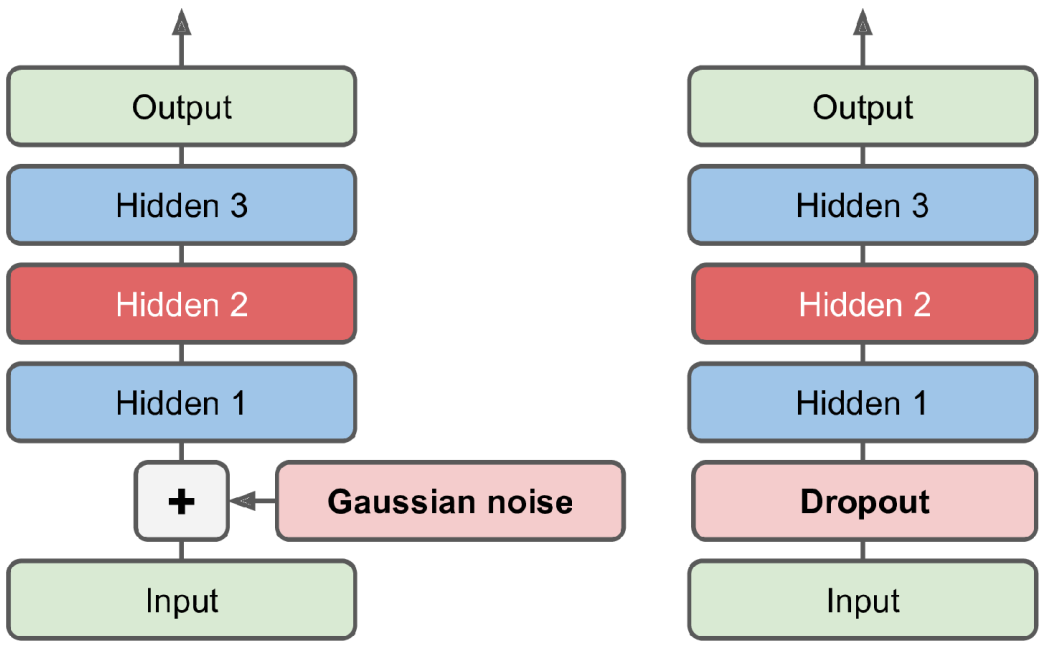

In [23]:
Image('figures/denoising_autoencoders.png',width=500)

The implementation is straightforward: it is a regular stacked autoencoder with an additional Dropout layer applied to the encoder's inputs (or you could use a ```GaussianNoise``` layer instead). Recall that the ```Dropout``` layer is only active during training (and so is the ```GaussianNoise``` layer):

In [ ]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Input(shape=[28,28]),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(28 * 28, activation='sigmoid'),
    keras.layers.Reshape([28, 28])
])

dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])

In [ ]:
dropout_ae.compile(loss='binary_crossentropy',
                   optimizer=keras.optimizers.SGD(learning_rate=1.5))

history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=[X_valid, X_valid])

In [ ]:
# Create images with dropped pixels

import scipy.stats as stats
dropout_rate=stats.bernoulli(0.5).rvs((X_valid.shape[0],28,28))

X_valid_in = X_valid*dropout_rate

X_valid_in.shape

In [ ]:
predictions = dropout_ae(X_valid_in)

predictions.shape

In [ ]:
n_images=15
plt.figure(figsize=(20,5))
for i in range(n_images):
    plt.subplot(2,15,i+1); plt.imshow(X_valid_in[i],cmap='binary');plt.axis('off')
    plt.subplot(2,15,i+16); plt.imshow(predictions[i],cmap='binary');plt.axis('off');

Notice how the autoencoder guesses details that are actually not in the input. As you can see, not only can denoising autoencoders be used for data visualization or unsupervised pretraining, like the other autoencoders we've discussed so far, but they can also be used quite simply and efficiently to remove noise from images.

---